# Starbucks Capstone Challenge

### Introduction

This data set contains simulated data that mimics customer behavior on the Starbucks rewards mobile app. Once every few days, Starbucks sends out an offer to users of the mobile app. An offer can be merely an advertisement for a drink or an actual offer such as a discount or BOGO (buy one get one free). Some users might not receive any offer during certain weeks. 

Not all users receive the same offer, and that is the challenge to solve with this data set.

Your task is to combine transaction, demographic and offer data to determine which demographic groups respond best to which offer type. This data set is a simplified version of the real Starbucks app because the underlying simulator only has one product whereas Starbucks actually sells dozens of products.

Every offer has a validity period before the offer expires. As an example, a BOGO offer might be valid for only 5 days. You'll see in the data set that informational offers have a validity period even though these ads are merely providing information about a product; for example, if an informational offer has 7 days of validity, you can assume the customer is feeling the influence of the offer for 7 days after receiving the advertisement.

You'll be given transactional data showing user purchases made on the app including the timestamp of purchase and the amount of money spent on a purchase. This transactional data also has a record for each offer that a user receives as well as a record for when a user actually views the offer. There are also records for when a user completes an offer. 

Keep in mind as well that someone using the app might make a purchase through the app without having received an offer or seen an offer.

### Example

To give an example, a user could receive a discount offer buy 10 dollars get 2 off on Monday. The offer is valid for 10 days from receipt. If the customer accumulates at least 10 dollars in purchases during the validity period, the customer completes the offer.

However, there are a few things to watch out for in this data set. Customers do not opt into the offers that they receive; in other words, a user can receive an offer, never actually view the offer, and still complete the offer. For example, a user might receive the "buy 10 dollars get 2 dollars off offer", but the user never opens the offer during the 10 day validity period. The customer spends 15 dollars during those ten days. There will be an offer completion record in the data set; however, the customer was not influenced by the offer because the customer never viewed the offer.

### Cleaning

This makes data cleaning especially important and tricky.

You'll also want to take into account that some demographic groups will make purchases even if they don't receive an offer. From a business perspective, if a customer is going to make a 10 dollar purchase without an offer anyway, you wouldn't want to send a buy 10 dollars get 2 dollars off offer. You'll want to try to assess what a certain demographic group will buy when not receiving any offers.

### Final Advice

Because this is a capstone project, you are free to analyze the data any way you see fit. For example, you could build a machine learning model that predicts how much someone will spend based on demographics and offer type. Or you could build a model that predicts whether or not someone will respond to an offer. Or, you don't need to build a machine learning model at all. You could develop a set of heuristics that determine what offer you should send to each customer (i.e., 75 percent of women customers who were 35 years old responded to offer A vs 40 percent from the same demographic to offer B, so send offer A).

# Data Sets

The data is contained in three files:

* portfolio.json - containing offer ids and meta data about each offer (duration, type, etc.)
* profile.json - demographic data for each customer
* transcript.json - records for transactions, offers received, offers viewed, and offers completed

Here is the schema and explanation of each variable in the files:

**portfolio.json**
* id (string) - offer id
* offer_type (string) - type of offer ie BOGO, discount, informational
* difficulty (int) - minimum required spend to complete an offer
* reward (int) - reward given for completing an offer
* duration (int) - time for offer to be open, in days
* channels (list of strings)

**profile.json**
* age (int) - age of the customer 
* became_member_on (int) - date when customer created an app account
* gender (str) - gender of the customer (note some entries contain 'O' for other rather than M or F)
* id (str) - customer id
* income (float) - customer's income

**transcript.json**
* event (str) - record description (ie transaction, offer received, offer viewed, etc.)
* person (str) - customer id
* time (int) - time in hours since start of test. The data begins at time t=0
* value - (dict of strings) - either an offer id or transaction amount depending on the record

**Note:** If you are using the workspace, you will need to go to the terminal and run the command `conda update pandas` before reading in the files. This is because the version of pandas in the workspace cannot read in the transcript.json file correctly, but the newest version of pandas can. You can access the termnal from the orange icon in the top left of this notebook.  

You can see how to access the terminal and how the install works using the two images below.  First you need to access the terminal:

<img src="pic1.png"/>

Then you will want to run the above command:

<img src="pic2.png"/>

Finally, when you enter back into the notebook (use the jupyter icon again), you should be able to run the below cell without any errors.

# 1. Fetching the Data

In [1]:
import pandas as pd
import numpy as np
import math
import json
% matplotlib inline

# read in the json files
portfolio = pd.read_json('data/portfolio.json', orient='records', lines=True)
profile = pd.read_json('data/profile.json', orient='records', lines=True)
transcript = pd.read_json('data/transcript.json', orient='records', lines=True)

# 2. Data Preparation and Cleaning

## 2.1 Data Preparation

In [2]:
def data_information(data):
    # input: data
    # output: description, info, head, shape, null values of the data
    print('description: ',data.describe())
    print('info: ',data.info())
    print('head: ',data.head())
    print('shape: ',data.shape)
    print('null values: ',data.isna().sum())

In [3]:
# portfolio data set analysis
data_information(portfolio)

('description: ',        difficulty   duration     reward
count   10.000000  10.000000  10.000000
mean     7.700000   6.500000   4.200000
std      5.831905   2.321398   3.583915
min      0.000000   3.000000   0.000000
25%      5.000000   5.000000   2.000000
50%      8.500000   7.000000   4.000000
75%     10.000000   7.000000   5.000000
max     20.000000  10.000000  10.000000)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 6 columns):
channels      10 non-null object
difficulty    10 non-null int64
duration      10 non-null int64
id            10 non-null object
offer_type    10 non-null object
reward        10 non-null int64
dtypes: int64(3), object(3)
memory usage: 552.0+ bytes
('info: ', None)
('head: ',                        channels  difficulty  duration  \
0       [email, mobile, social]          10         7   
1  [web, email, mobile, social]          10         5   
2          [web, email, mobile]           0         4   
3          [we

In [4]:
# unique id in portfolio data set
print(portfolio.id.unique())
print('Unique id: ',portfolio['id'].count())

[u'ae264e3637204a6fb9bb56bc8210ddfd' u'4d5c57ea9a6940dd891ad53e9dbe8da0'
 u'3f207df678b143eea3cee63160fa8bed' u'9b98b8c7a33c4b65b9aebfe6a799e6d9'
 u'0b1e1539f2cc45b7b9fa7c272da2e1d7' u'2298d6c36e964ae4a3e7e9706d1fb8c2'
 u'fafdcd668e3743c1bb461111dcafc2a4' u'5a8bc65990b245e5a138643cd4eb9837'
 u'f19421c1d4aa40978ebb69ca19b0e20d' u'2906b810c7d4411798c6938adc9daaa5']
('Unique id: ', 10)


portfolio.head()

In [5]:
# profile data set analysis
data_information(profile)

('description: ',                 age  became_member_on         income
count  17000.000000      1.700000e+04   14825.000000
mean      62.531412      2.016703e+07   65404.991568
std       26.738580      1.167750e+04   21598.299410
min       18.000000      2.013073e+07   30000.000000
25%       45.000000      2.016053e+07   49000.000000
50%       58.000000      2.017080e+07   64000.000000
75%       73.000000      2.017123e+07   80000.000000
max      118.000000      2.018073e+07  120000.000000)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 5 columns):
age                 17000 non-null int64
became_member_on    17000 non-null int64
gender              14825 non-null object
id                  17000 non-null object
income              14825 non-null float64
dtypes: float64(1), int64(2), object(2)
memory usage: 664.1+ KB
('info: ', None)
('head: ',    age  became_member_on gender                                id    income
0  118          201

In [6]:
# unique id in profile data set
print(profile.id.unique())
print('Unique id: ',profile['id'].count())

[u'68be06ca386d4c31939f3a4f0e3dd783' u'0610b486422d4921ae7d2bf64640c50b'
 u'38fe809add3b4fcf9315a9694bb96ff5' ...
 u'01d26f638c274aa0b965d24cefe3183f' u'9dc1421481194dcd9400aec7c9ae6366'
 u'e4052622e5ba45a8b96b59aba68cf068']
('Unique id: ', 17000)


In [7]:
# drop missing values (NAN) in profile data set
profile.dropna(inplace=True)

In [8]:
data_information(profile)

('description: ',                 age  became_member_on         income
count  14825.000000      1.482500e+04   14825.000000
mean      54.393524      2.016689e+07   65404.991568
std       17.383705      1.188565e+04   21598.299410
min       18.000000      2.013073e+07   30000.000000
25%       42.000000      2.016052e+07   49000.000000
50%       55.000000      2.017080e+07   64000.000000
75%       66.000000      2.017123e+07   80000.000000
max      101.000000      2.018073e+07  120000.000000)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 14825 entries, 1 to 16999
Data columns (total 5 columns):
age                 14825 non-null int64
became_member_on    14825 non-null int64
gender              14825 non-null object
id                  14825 non-null object
income              14825 non-null float64
dtypes: float64(1), int64(2), object(2)
memory usage: 694.9+ KB
('info: ', None)
('head: ',     age  became_member_on gender                                id    income
1    55          2

In [9]:
# renaming id column to customer in profile data set to avoid any confusion with id (offer) in portfolio data set
profile.rename(columns={'id':'customer'}, inplace=True)
print(profile.columns)

Index([u'age', u'became_member_on', u'gender', u'customer', u'income'], dtype='object')


In [10]:
# transcript data set analysis
data_information(transcript)

('description: ',                 time
count  306534.000000
mean      366.382940
std       200.326314
min         0.000000
25%       186.000000
50%       408.000000
75%       528.000000
max       714.000000)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306534 entries, 0 to 306533
Data columns (total 4 columns):
event     306534 non-null object
person    306534 non-null object
time      306534 non-null int64
value     306534 non-null object
dtypes: int64(1), object(3)
memory usage: 9.4+ MB
('info: ', None)
('head: ',             event                            person  time  \
0  offer received  78afa995795e4d85b5d9ceeca43f5fef     0   
1  offer received  a03223e636434f42ac4c3df47e8bac43     0   
2  offer received  e2127556f4f64592b11af22de27a7932     0   
3  offer received  8ec6ce2a7e7949b1bf142def7d0e0586     0   
4  offer received  68617ca6246f4fbc85e91a2a49552598     0   

                                               value  
0  {u'offer id': u'9b98b8c7a33c4b65b9aebfe6a799e6..

# 2.2 Cleaning

In [11]:
# dividing age in 5 bins
profile['age_groups'] = pd.cut(profile.age, bins=[0, 18, 30, 50, 70, 110], labels=['child', 'teen', 'young_adults', 'middle_age_adults', 'elderly'])

In [12]:
#Transform the became_member_on to Month / year Format.
#Claculating the cumulative number of days since the subscription start.
import datetime as dt
def member_days(profile):
    profile.became_member_on = pd.to_datetime(profile.became_member_on,format='%Y%m%d')
    profile['member_launch_Cum_days'] = (profile.became_member_on - dt.datetime(1971, 3, 31)).dt.days
    profile['member_launch_year'] = profile['became_member_on'].dt.year
    
    return profile.head()

In [13]:
member_days(profile)

,age,became_member_on,gender,customer,income,age_groups,member_launch_Cum_days,member_launch_year
1,55,2017-07-15,F,0610b486422d4921ae7d2bf64640c50b,112000.0,middle_age_adults,16908,2017
3,75,2017-05-09,F,78afa995795e4d85b5d9ceeca43f5fef,100000.0,elderly,16841,2017
5,68,2018-04-26,M,e2127556f4f64592b11af22de27a7932,70000.0,middle_age_adults,17193,2018
8,65,2018-02-09,M,389bc3fa690240e798340f5a15918d5c,53000.0,middle_age_adults,17117,2018
12,58,2017-11-11,M,2eeac8d8feae4a8cad5a6af0499a211d,51000.0,middle_age_adults,17027,2017


In [14]:
# cleaning transcript data set
def clean_transcript(transcript):
    # input: transcript dataframe
    # output: offer id, amount - cleaned offer dataframe, dropping value
    offer = transcript[transcript['value'].apply(lambda x: True 
                                                 if ('offer id' in x)
                                                 or ('offer_id' in x) 
                                                 or ('amount' in x)  
                                                 else False)]
    offer['offer_id'] = offer['value'].apply(lambda x: x['offer id'] 
                                             if ('offer id' in x) 
                                             else (x['offer_id'] 
                                             if ('offer_id' in x)  else '0'))
    offer['amount'] = offer['value'].apply(lambda x: x['amount'] 
                                           if ('amount' in x) 
                                           else '0')
    return offer

In [15]:
Clean_transcript = clean_transcript(transcript)
Updated_transcript=Clean_transcript.drop(['value'],axis=1)

In [16]:
# rename person column to customer
Updated_transcript.rename(columns={'person':'customer'}, inplace=True)

In [17]:
Updated_transcript.head()

,event,customer,time,offer_id,amount
0,offer received,78afa995795e4d85b5d9ceeca43f5fef,0,9b98b8c7a33c4b65b9aebfe6a799e6d9,0
1,offer received,a03223e636434f42ac4c3df47e8bac43,0,0b1e1539f2cc45b7b9fa7c272da2e1d7,0
2,offer received,e2127556f4f64592b11af22de27a7932,0,2906b810c7d4411798c6938adc9daaa5,0
3,offer received,8ec6ce2a7e7949b1bf142def7d0e0586,0,fafdcd668e3743c1bb461111dcafc2a4,0
4,offer received,68617ca6246f4fbc85e91a2a49552598,0,4d5c57ea9a6940dd891ad53e9dbe8da0,0


In [18]:
# cleaning portfolio data set
def clean_Portfolio(portfolio):
    # input: portfolio dataframe
    # output: cleaned portfolio
    
    # change the duration from day to hour
    updated_portfolio = portfolio.copy()
    updated_portfolio['duration'] = updated_portfolio['duration'] * 24
    
    # apply one hot encoding to channels column
    updated_portfolio['web'] = updated_portfolio['channels'].apply(lambda x: 1 
                                                                   if 'web' in x 
                                                                   else 0)
    updated_portfolio['email'] = updated_portfolio['channels'].apply(lambda x: 1 
                                                                     if 'email' in x 
                                                                     else 0)
    updated_portfolio['mobile'] = updated_portfolio['channels'].apply(lambda x: 1 
                                                                      if 'mobile' in 
                                                                      x else 0)
    updated_portfolio['social'] = updated_portfolio['channels'].apply(lambda x: 1 
                                                                      if 'social' in x 
                                                                      else 0)
    
    updated_portfolio.drop(['channels'], axis=1, inplace=True)
    
    return updated_portfolio

In [19]:
updated_portfolio=clean_Portfolio(portfolio)

In [20]:
# rename id column to offer_id
updated_portfolio.rename(columns={'id':'offer_id'}, inplace=True)

In [21]:
updated_portfolio.head()

,difficulty,duration,offer_id,offer_type,reward,web,email,mobile,social
0,10,168,ae264e3637204a6fb9bb56bc8210ddfd,bogo,10,0,1,1,1
1,10,120,4d5c57ea9a6940dd891ad53e9dbe8da0,bogo,10,1,1,1,1
2,0,96,3f207df678b143eea3cee63160fa8bed,informational,0,1,1,1,0
3,5,168,9b98b8c7a33c4b65b9aebfe6a799e6d9,bogo,5,1,1,1,0
4,20,240,0b1e1539f2cc45b7b9fa7c272da2e1d7,discount,5,1,1,0,0


# 3. Data Vizualization and Analysis

## 3.1 Data Vizualization

### 3.1.1 Profile Data Vizualization

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

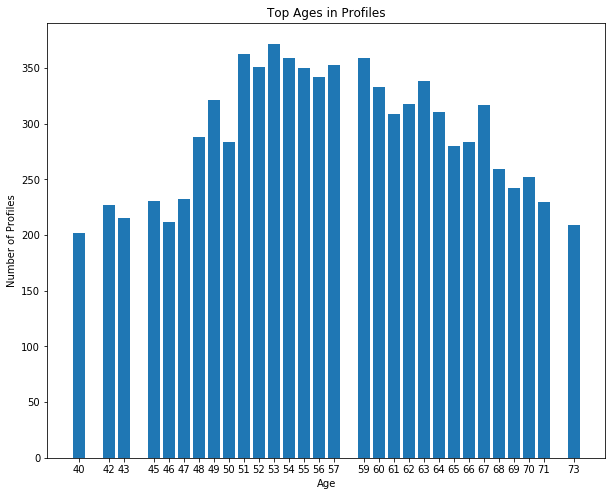

In [23]:
#Histogram for profiles of TOP 30 Customers according to their ages
plt.figure(figsize=(10, 8))
top30_ages = profile['age'].value_counts()[1:].head(30).reset_index()
plt.bar(top30_ages['index'], top30_ages['age'])
plt.title('Top Ages in Profiles')
plt.ylabel('Number of Profiles')
plt.xlabel('Age')
plt.xticks(top30_ages['index'], rotation = 0)
plt.show();

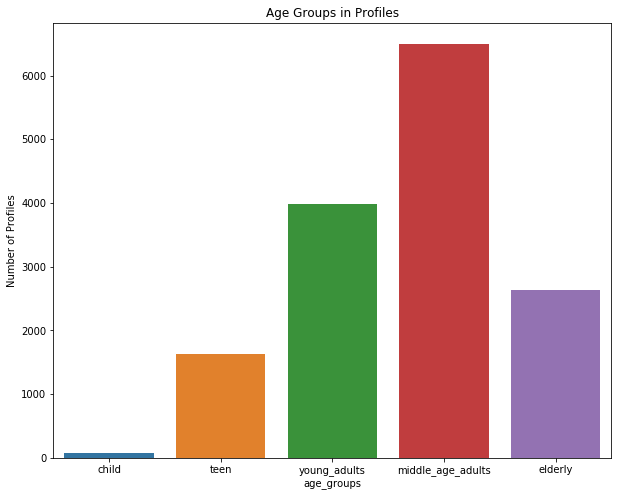

In [24]:
# age_groups, number of profiles 
plt.figure(figsize=(10, 8))
sns.countplot(profile['age_groups'])
plt.title('Age Groups in Profiles')
plt.ylabel('Number of Profiles')
plt.xlabel('age_groups')
plt.xticks(rotation = 0)
plt.show();

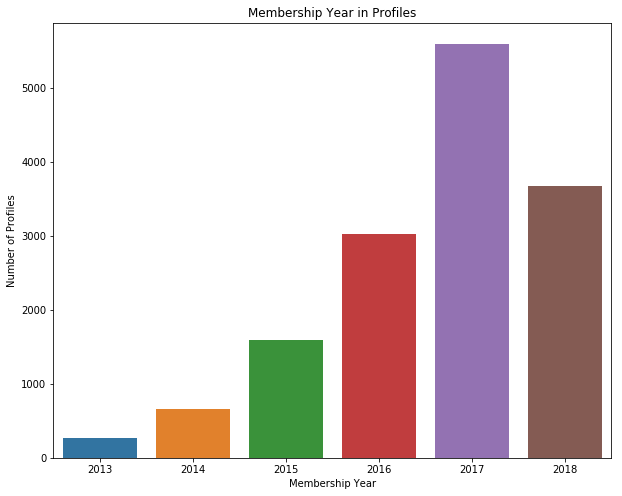

In [25]:
# membership_launch_year, number of profiles
plt.figure(figsize=(10, 8))
sns.countplot(profile['member_launch_year'])
plt.title('Membership Year in Profiles')
plt.ylabel('Number of Profiles')
plt.xlabel('Membership Year')
plt.xticks(rotation = 0)
plt.show();

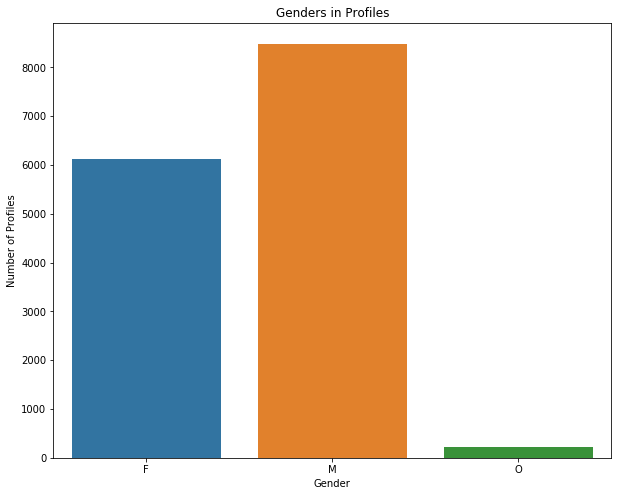

In [26]:
# gender, number of profiles
plt.figure(figsize=(10, 8))
sns.countplot(profile['gender'])
plt.title('Genders in Profiles')
plt.ylabel('Number of Profiles')
plt.xlabel('Gender')
plt.xticks(rotation = 0)
plt.show();

### 3.1.2 Transcript Data Vizualization

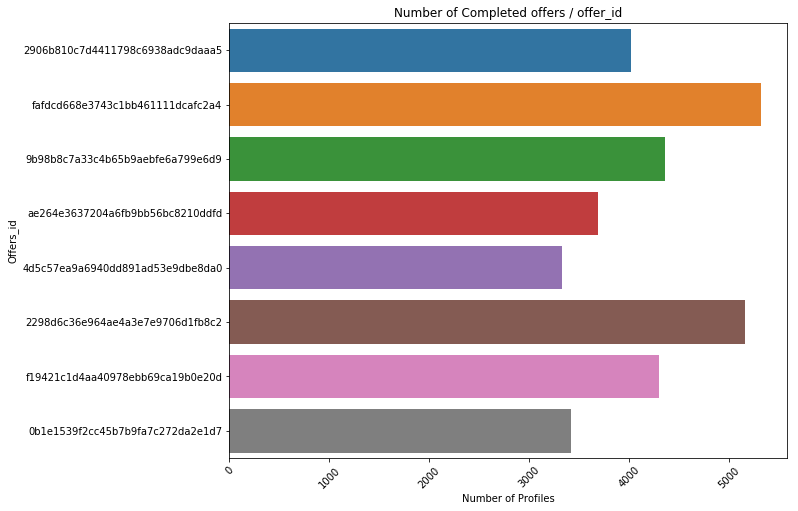

In [27]:
# offer completed, offer id
Completed_offers = Updated_transcript[Updated_transcript['event'] == 'offer completed']
plt.figure(figsize=(10, 8))
sns.countplot(y=Completed_offers['offer_id'])
plt.title('Number of Completed offers / offer_id')
plt.ylabel('Offers_id')
plt.xlabel('Number of Profiles')
plt.xticks(rotation = 45)
plt.show();

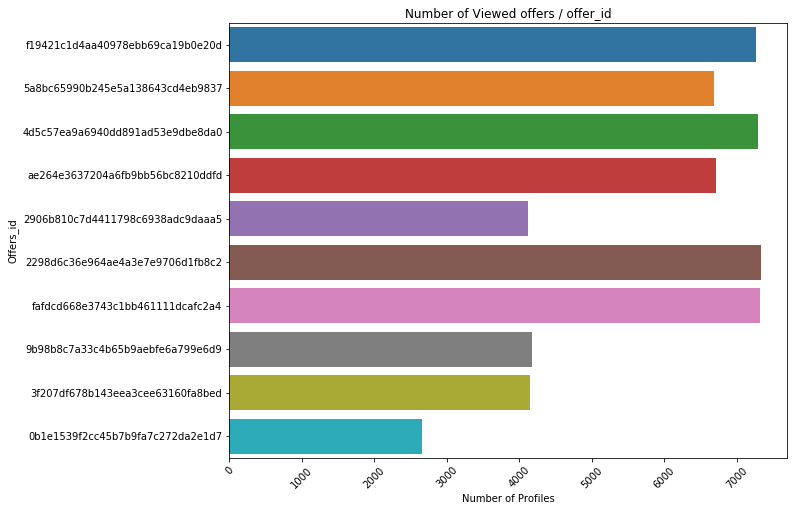

In [28]:
# offer viewed, offer id
Completed_offers = Updated_transcript[Updated_transcript['event'] == 'offer viewed']
plt.figure(figsize=(10, 8))
sns.countplot(y=Completed_offers['offer_id'])
plt.title('Number of Viewed offers / offer_id')
plt.ylabel('Offers_id')
plt.xlabel('Number of Profiles')
plt.xticks(rotation = 45)
plt.show();

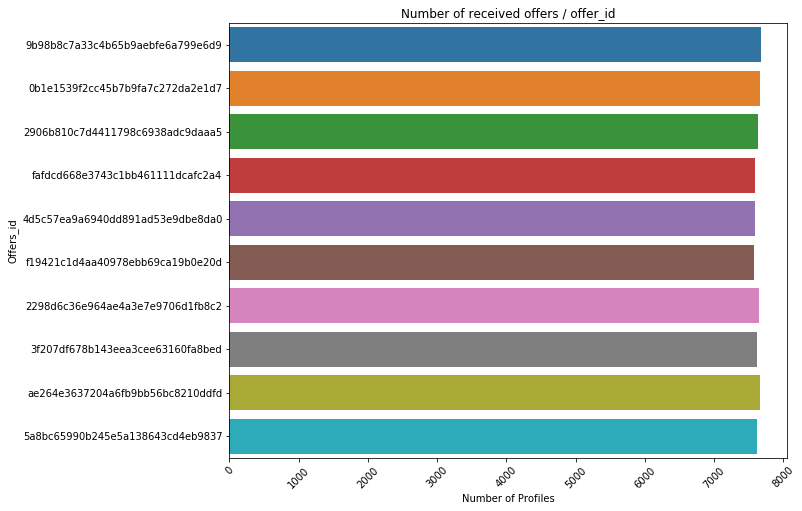

In [29]:
# offer received, offer id
Completed_offers = Updated_transcript[Updated_transcript['event'] == 'offer received']
plt.figure(figsize=(10, 8))
sns.countplot(y=Completed_offers['offer_id'])
plt.title('Number of received offers / offer_id')
plt.ylabel('Offers_id')
plt.xlabel('Number of Profiles')
plt.xticks(rotation = 45)
plt.show();

In [30]:
# counts per customer
print(Updated_transcript.customer.unique())
counts_per_customer=Updated_transcript.groupby(['customer']).size().reset_index(name="Count_customer")
display(counts_per_customer)

[u'78afa995795e4d85b5d9ceeca43f5fef' u'a03223e636434f42ac4c3df47e8bac43'
 u'e2127556f4f64592b11af22de27a7932' ...
 u'912b9f623b9e4b4eb99b6dc919f09a93' u'3045af4e98794a04a5542d3eac939b1f'
 u'da7a7c0dcfcb41a8acc7864a53cf60fb']


,customer,Count_customer
0,0009655768c64bdeb2e877511632db8f,20
1,00116118485d4dfda04fdbaba9a87b5c,7
2,0011e0d4e6b944f998e987f904e8c1e5,18
3,0020c2b971eb4e9188eac86d93036a77,19
4,0020ccbbb6d84e358d3414a3ff76cffd,23
5,003d66b6608740288d6cc97a6903f4f0,30
6,00426fe3ffde4c6b9cb9ad6d077a13ea,25
7,004b041fbfe44859945daa2c7f79ee64,13
8,004c5799adbf42868b9cff0396190900,26
9,005500a7188546ff8a767329a2f7c76a,13


### 3.1.3 Portfolio Data Visualization

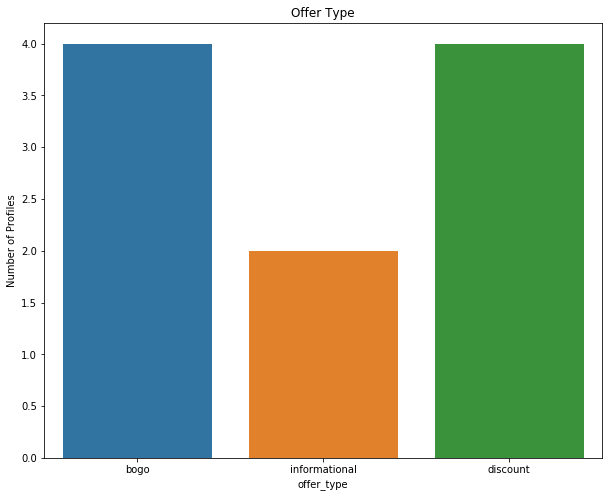

In [31]:
# offer type, no. of profiles
plt.figure(figsize=(10, 8))
sns.countplot(updated_portfolio['offer_type'])
plt.title('Offer Type')
plt.ylabel('Number of Profiles')
plt.xlabel('offer_type')
plt.xticks(rotation = 0)
plt.show();

### 3.1.4 Combining Portfolio, Profile and Transcript Data

In [32]:
# Updated transcript and Profile data sets 
Combined_data = pd.merge(Updated_transcript, profile, on=['customer'],how='inner')
Combined_data.head()

,event,customer,time,offer_id,amount,age,became_member_on,gender,income,age_groups,member_launch_Cum_days,member_launch_year
0,offer received,78afa995795e4d85b5d9ceeca43f5fef,0,9b98b8c7a33c4b65b9aebfe6a799e6d9,0,75,2017-05-09,F,100000.0,elderly,16841,2017
1,offer viewed,78afa995795e4d85b5d9ceeca43f5fef,6,9b98b8c7a33c4b65b9aebfe6a799e6d9,0,75,2017-05-09,F,100000.0,elderly,16841,2017
2,transaction,78afa995795e4d85b5d9ceeca43f5fef,132,0,19.89,75,2017-05-09,F,100000.0,elderly,16841,2017
3,offer completed,78afa995795e4d85b5d9ceeca43f5fef,132,9b98b8c7a33c4b65b9aebfe6a799e6d9,0,75,2017-05-09,F,100000.0,elderly,16841,2017
4,transaction,78afa995795e4d85b5d9ceeca43f5fef,144,0,17.78,75,2017-05-09,F,100000.0,elderly,16841,2017


In [33]:
# Combined_data and updated_portfolio data sets
Combined_all_data= pd.merge(Combined_data,updated_portfolio, on=['offer_id'],how='left')
Combined_all_data.head()

,event,customer,time,offer_id,amount,age,became_member_on,gender,income,age_groups,member_launch_Cum_days,member_launch_year,difficulty,duration,offer_type,reward,web,email,mobile,social
0,offer received,78afa995795e4d85b5d9ceeca43f5fef,0,9b98b8c7a33c4b65b9aebfe6a799e6d9,0,75,2017-05-09,F,100000.0,elderly,16841,2017,5.0,168.0,bogo,5.0,1.0,1.0,1.0,0.0
1,offer viewed,78afa995795e4d85b5d9ceeca43f5fef,6,9b98b8c7a33c4b65b9aebfe6a799e6d9,0,75,2017-05-09,F,100000.0,elderly,16841,2017,5.0,168.0,bogo,5.0,1.0,1.0,1.0,0.0
2,transaction,78afa995795e4d85b5d9ceeca43f5fef,132,0,19.89,75,2017-05-09,F,100000.0,elderly,16841,2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,offer completed,78afa995795e4d85b5d9ceeca43f5fef,132,9b98b8c7a33c4b65b9aebfe6a799e6d9,0,75,2017-05-09,F,100000.0,elderly,16841,2017,5.0,168.0,bogo,5.0,1.0,1.0,1.0,0.0
4,transaction,78afa995795e4d85b5d9ceeca43f5fef,144,0,17.78,75,2017-05-09,F,100000.0,elderly,16841,2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
Combined_all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 272762 entries, 0 to 272761
Data columns (total 20 columns):
event                     272762 non-null object
customer                  272762 non-null object
time                      272762 non-null int64
offer_id                  272762 non-null object
amount                    272762 non-null object
age                       272762 non-null int64
became_member_on          272762 non-null datetime64[ns]
gender                    272762 non-null object
income                    272762 non-null float64
age_groups                272762 non-null category
member_launch_Cum_days    272762 non-null int64
member_launch_year        272762 non-null int64
difficulty                148805 non-null float64
duration                  148805 non-null float64
offer_type                148805 non-null object
reward                    148805 non-null float64
web                       148805 non-null float64
email                     148805 non-null flo

In [35]:
# amount column type to float
Combined_all_data['amount'] = Combined_all_data.amount.astype(float)
# Replacing NAN values with zeros for transaction event 
Combined_all_data=Combined_all_data.replace(np.nan,0)
Combined_all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 272762 entries, 0 to 272761
Data columns (total 20 columns):
event                     272762 non-null object
customer                  272762 non-null object
time                      272762 non-null int64
offer_id                  272762 non-null object
amount                    272762 non-null float64
age                       272762 non-null int64
became_member_on          272762 non-null datetime64[ns]
gender                    272762 non-null object
income                    272762 non-null float64
age_groups                272762 non-null object
member_launch_Cum_days    272762 non-null int64
member_launch_year        272762 non-null int64
difficulty                272762 non-null float64
duration                  272762 non-null float64
offer_type                272762 non-null object
reward                    272762 non-null float64
web                       272762 non-null float64
email                     272762 non-null floa

In [36]:
Combined_all_data.describe()

,time,amount,age,income,member_launch_Cum_days,member_launch_year,difficulty,duration,reward,web,email,mobile,social
count,272762.000000,272762.000000,272762.000000,272762.000000,272762.000000,272762.000000,272762.000000,272762.000000,272762.000000,272762.000000,272762.000000,272762.000000,272762.000000
mean,366.707694,6.360646,53.840696,64337.000755,16702.708050,2016.457435,4.304687,86.744986,2.423571,0.440120,0.545549,0.500356,0.359141
std,200.359087,22.509207,17.551337,21243.762941,428.810204,1.218663,5.413062,87.737877,3.331264,0.496402,0.497922,0.500001,0.479749
min,0.000000,0.000000,18.000000,30000.000000,15461.000000,2013.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,186.000000,0.000000,41.000000,48000.000000,16422.000000,2016.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,408.000000,0.000000,55.000000,62000.000000,16813.000000,2017.000000,0.000000,72.000000,0.000000,0.000000,1.000000,1.000000,0.000000
75%,528.000000,9.140000,66.000000,78000.000000,17042.000000,2017.000000,10.000000,168.000000,5.000000,1.000000,1.000000,1.000000,1.000000
max,714.000000,1062.280000,101.000000,120000.000000,17284.000000,2018.000000,20.000000,240.000000,10.000000,1.000000,1.000000,1.000000,1.000000


### 3.1.5 Data Visualization for Combined Data

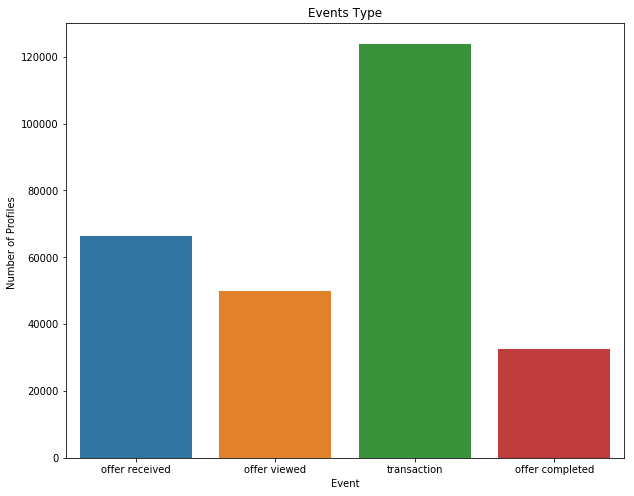

In [37]:
# Event, no. of profiles

plt.figure(figsize=(10, 8))
sns.countplot(Combined_all_data['event'])
plt.title('Events Type')
plt.ylabel('Number of Profiles ')
plt.xlabel('Event')
plt.xticks(rotation = 0)
plt.show();

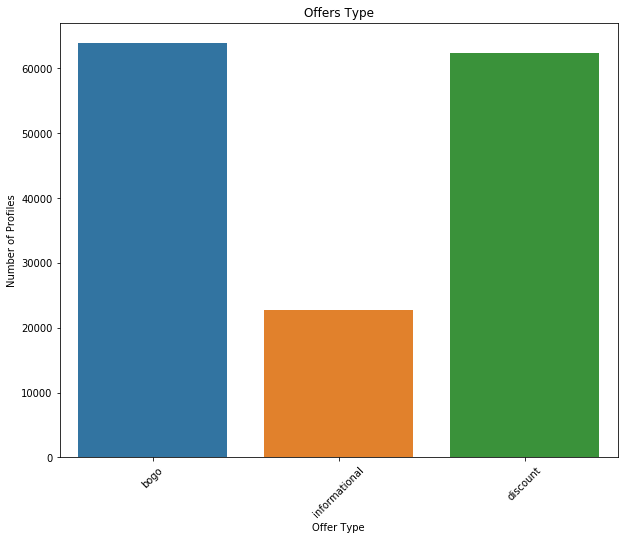

In [38]:
# offer type vs no. of profiles

plt.figure(figsize=(10, 8))
sns.countplot(Combined_all_data[Combined_all_data['offer_type'] != 0]['offer_type'])
plt.title('Offers Type')
plt.ylabel('Number of Profiles')
plt.xlabel('Offer Type')
plt.xticks(rotation = 45)
plt.show();

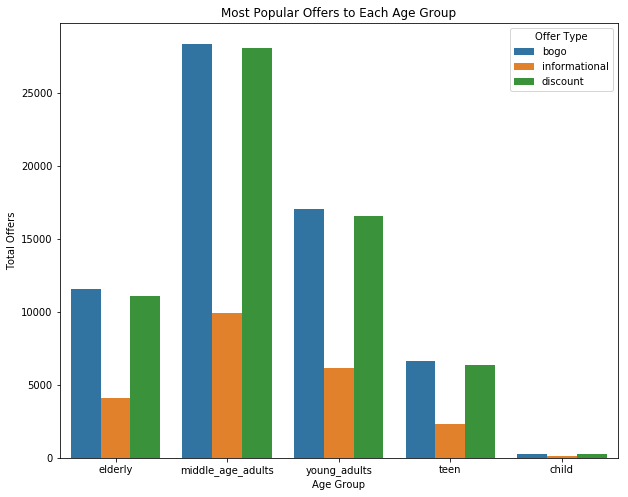

In [39]:
# age group vs offer type

plt.figure(figsize=(10, 8))
y=Combined_all_data[Combined_all_data['offer_type'] != 0]['offer_type']
X=Combined_all_data[Combined_all_data['offer_type'] != 0]['age_groups']
sns.countplot(x=X, hue=y, data=Combined_all_data)
plt.title('Most Popular Offers to Each Age Group')
plt.ylabel('Total Offers')
plt.xlabel('Age Group')
plt.xticks(rotation = 0)
plt.legend(title='Offer Type')
plt.show();

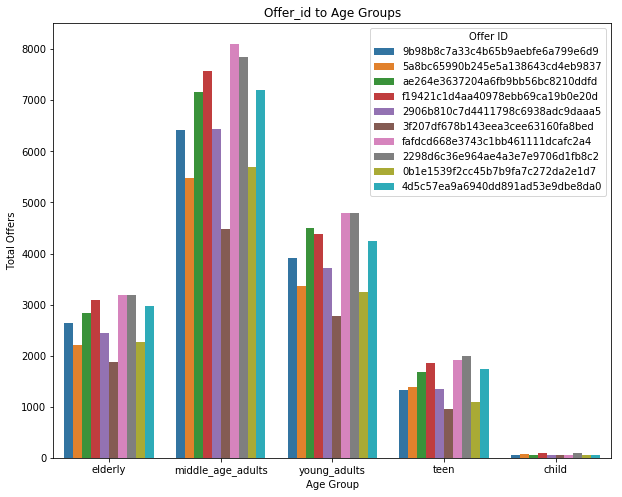

In [40]:
# age groups vs offer id

plt.figure(figsize=(10, 8))
y=Combined_all_data[Combined_all_data['offer_id'] != '0']['offer_id']
X=Combined_all_data[Combined_all_data['offer_id'] != '0']['age_groups']
sns.countplot(x=X, hue=y, data=Combined_all_data)
plt.title('Offer_id to Age Groups')
plt.ylabel('Total Offers')
plt.xlabel('Age Group')
plt.xticks(rotation = 0)
plt.legend(title='Offer ID')
plt.show();

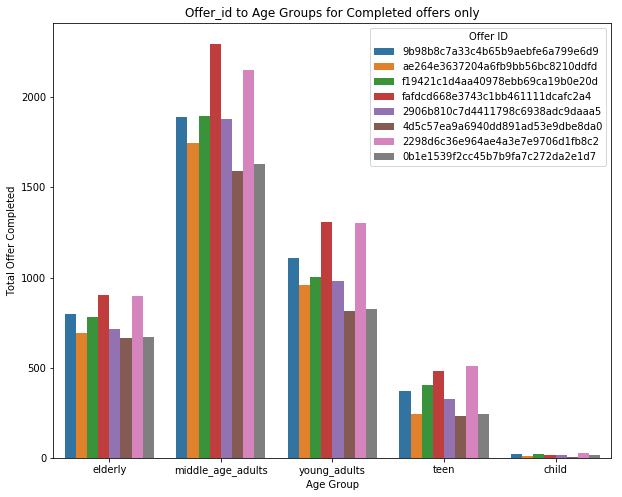

In [41]:
# age groups vs completed offer id

plt.figure(figsize=(10, 8))
y=Combined_all_data[(Combined_all_data['offer_id'] != '0' )&( Combined_all_data['event'] == 'offer completed') ]['offer_id']
X=Combined_all_data[(Combined_all_data['offer_id'] != '0') & (Combined_all_data['event'] == 'offer completed')]['age_groups']
sns.countplot(x=X, hue=y, data=Combined_all_data)
plt.title('Offer_id to Age Groups for Completed offers only')
plt.ylabel('Total Offer Completed')
plt.xlabel('Age Group')
plt.xticks(rotation = 0)
plt.legend(title='Offer ID')
plt.show();

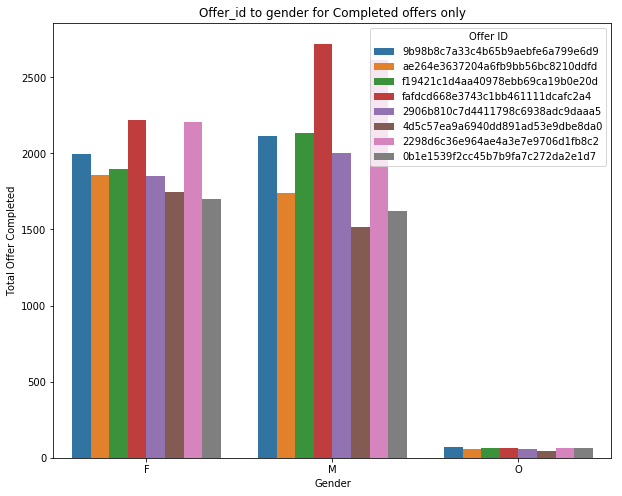

In [42]:
# gender vs completed offer id

plt.figure(figsize=(10, 8))
y=Combined_all_data[(Combined_all_data['offer_id'] != '0' )&( Combined_all_data['event'] == 'offer completed') ]['offer_id']
X=Combined_all_data[(Combined_all_data['offer_id'] != '0') & (Combined_all_data['event'] == 'offer completed')]['gender']
sns.countplot(x=X, hue=y, data=Combined_all_data)
plt.title('Offer_id to gender for Completed offers only')
plt.ylabel('Total Offer Completed')
plt.xlabel('Gender')
plt.xticks(rotation = 0)
plt.legend(title='Offer ID')
plt.show();

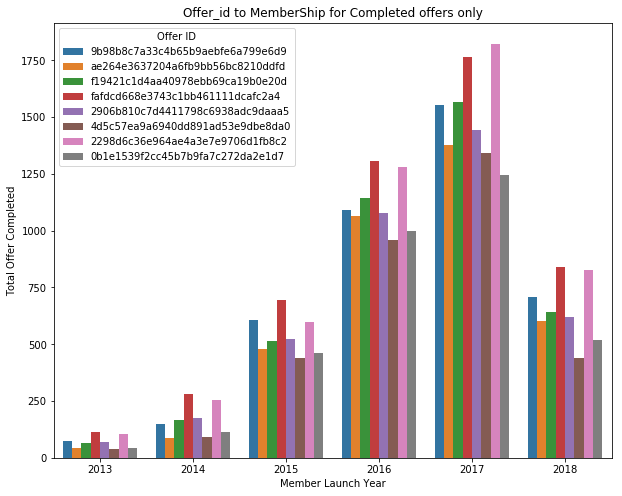

In [43]:
# membership launch year vs completed offer id

plt.figure(figsize=(10, 8))
y=Combined_all_data[(Combined_all_data['offer_id'] != '0' )&( Combined_all_data['event'] == 'offer completed') ]['offer_id']
X=Combined_all_data[(Combined_all_data['offer_id'] != '0') & (Combined_all_data['event'] == 'offer completed')]['member_launch_year']
sns.countplot(x=X, hue=y, data=Combined_all_data)
plt.title('Offer_id to MemberShip for Completed offers only')
plt.ylabel('Total Offer Completed')
plt.xlabel('Member Launch Year')
plt.xticks(rotation = 0)
plt.legend(title='Offer ID')
plt.show();

/home/ec2-user/anaconda3/envs/amazonei_mxnet_p27/lib/python2.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/home/ec2-user/anaconda3/envs/amazonei_mxnet_p27/lib/python2.7/site-packages/seaborn/categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


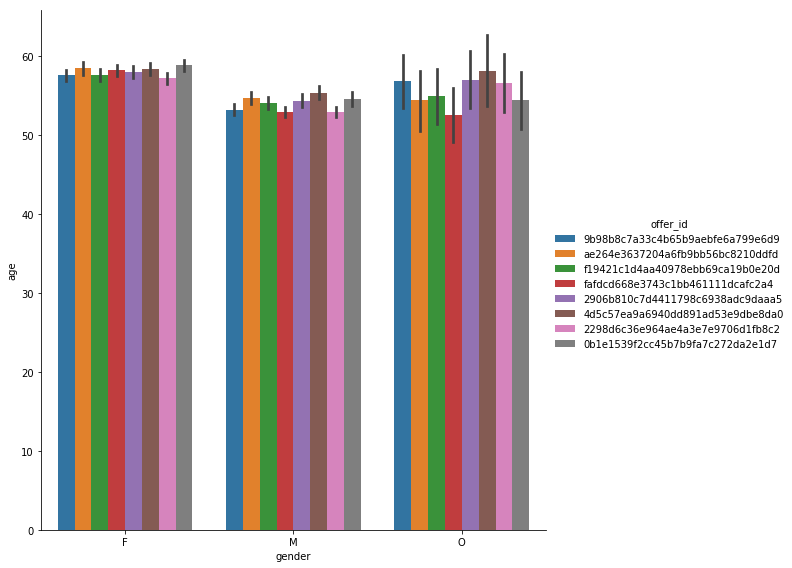

In [44]:
# only offer completed data

selected_data=Combined_all_data[(Combined_all_data['offer_id'] != '0') &( Combined_all_data['event'] == 'offer completed')]
HUE=selected_data['offer_id']
Y=selected_data['age']
X=selected_data['gender']
sns.factorplot(x='gender', y='age' , data=selected_data, hue='offer_id',size=8,kind='bar', aspect=1)

In [45]:
selected_data.head()

,event,customer,time,offer_id,amount,age,became_member_on,gender,income,age_groups,member_launch_Cum_days,member_launch_year,difficulty,duration,offer_type,reward,web,email,mobile,social
3,offer completed,78afa995795e4d85b5d9ceeca43f5fef,132,9b98b8c7a33c4b65b9aebfe6a799e6d9,0.0,75,2017-05-09,F,100000.0,elderly,16841,2017,5.0,168.0,bogo,5.0,1.0,1.0,1.0,0.0
14,offer completed,78afa995795e4d85b5d9ceeca43f5fef,510,ae264e3637204a6fb9bb56bc8210ddfd,0.0,75,2017-05-09,F,100000.0,elderly,16841,2017,10.0,168.0,bogo,10.0,0.0,1.0,1.0,1.0
15,offer completed,78afa995795e4d85b5d9ceeca43f5fef,510,f19421c1d4aa40978ebb69ca19b0e20d,0.0,75,2017-05-09,F,100000.0,elderly,16841,2017,5.0,120.0,bogo,5.0,1.0,1.0,1.0,1.0
28,offer completed,e2127556f4f64592b11af22de27a7932,522,9b98b8c7a33c4b65b9aebfe6a799e6d9,0.0,68,2018-04-26,M,70000.0,middle_age_adults,17193,2018,5.0,168.0,bogo,5.0,1.0,1.0,1.0,0.0
29,offer completed,e2127556f4f64592b11af22de27a7932,522,fafdcd668e3743c1bb461111dcafc2a4,0.0,68,2018-04-26,M,70000.0,middle_age_adults,17193,2018,10.0,240.0,discount,2.0,1.0,1.0,1.0,1.0


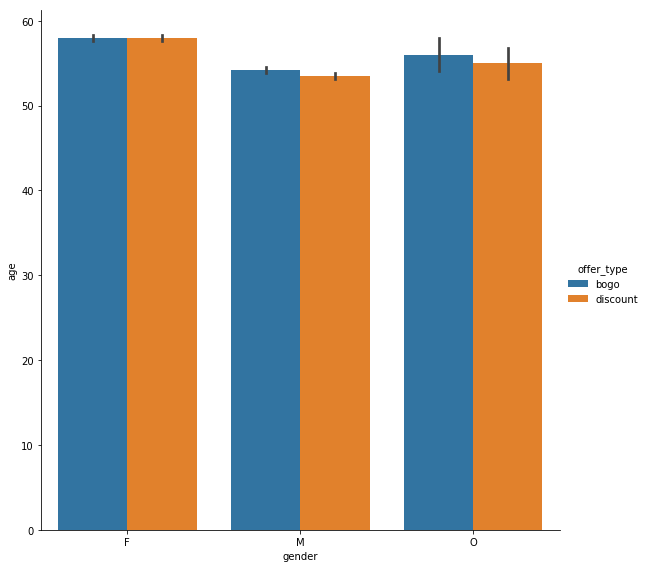

In [46]:
sns.factorplot(x='gender', y='age' , data=selected_data, hue='offer_type',size=8,kind='bar', aspect=1)

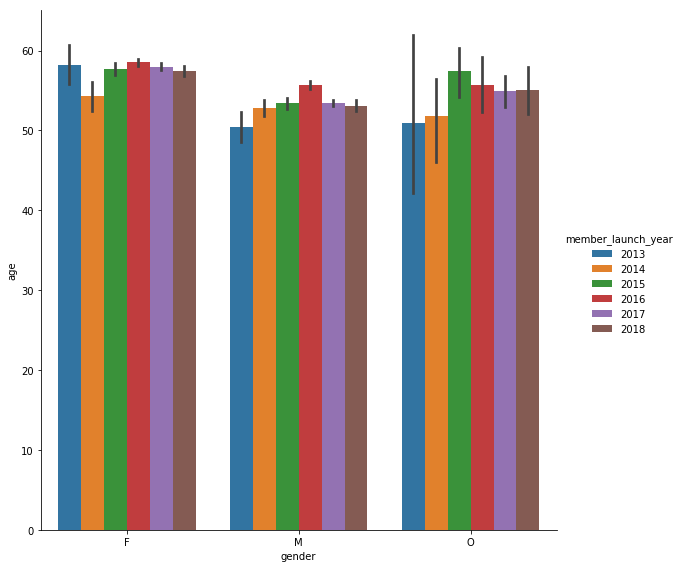

In [47]:
sns.factorplot(x='gender', y='age' , data=selected_data, hue='member_launch_year',size=8,kind='bar', aspect=1)

## 3.2 Data Analysis

In [48]:
# analyzing event type vs genders and offer type vs gender
data_gender_offertype = Combined_all_data[Combined_all_data['gender']!= 'NA'].groupby(['gender','offer_type']).count()
data_gender_event = Combined_all_data[(Combined_all_data['gender']!= 'NA')].groupby(['gender','event']).count()

df2_gender_offertype_F = data_gender_offertype.loc[('F')]['event'].sum()
df2_gender_offertype_M = data_gender_offertype.loc[('M')]['event'].sum()

df2_gender_offertype_event_F = data_gender_offertype.loc[('F')].loc[['bogo', 'discount', 'informational']]['event'].sum()
df2_gender_offertype_event_M = data_gender_offertype.loc[('M')].loc[['bogo', 'discount', 'informational']]['event'].sum()

offer_received = data_gender_event.loc[('F', 'offer received')].values[0]
total_offer_received_F = df2_gender_offertype_event_F
print('For Females: ')
print("Number of offer received: " + str(offer_received) +  ' ' +
      str(round((offer_received/np.float(total_offer_received_F))*100,1)) + "% of total offers.")

print("Number of offer viewed: " + str(data_gender_event.loc[('F', 'offer viewed')].values[0]) + ' ' +
      str(round((data_gender_event.loc[('F', 'offer viewed')].values[0]/np.float(df2_gender_offertype_event_F))*100,1)) + 
      " % of total offers.") 
print("Number of offer completed: " + str(data_gender_event.loc[('F', 'offer completed')].values[0]) + ' ' +
      str(round((data_gender_event.loc[('F', 'offer completed')].values[0]/np.float(data_gender_event.loc[('F', 'offer received')].values[0]))*100,1)) +
      " of received offers.")
print('\nFor Males:')
print("Number of offer received: " + str(data_gender_event.loc[('M', 'offer received')].values[0]) + ' ' + 
      str(round((data_gender_event.loc[('M', 'offer received')].values[0]/np.float(df2_gender_offertype_event_M))*100,1)) + 
      " % of total offers.")
print("Number of offer viewed: " + str(data_gender_event.loc[('M', 'offer viewed')].values[0]) + ' ' + 
      str(round((data_gender_event.loc[('M', 'offer viewed')].values[0]/np.float(df2_gender_offertype_event_M))*100,1)) + 
      " of total offers.") 
print("Number of offer completed: " + str(data_gender_event.loc[('M', 'offer completed')].values[0]) + ' ' +
      str(round((data_gender_event.loc[('M', 'offer completed')].values[0]/np.float(data_gender_event.loc[('M', 'offer received')].values[0]))*100,1)) +
      " % of received offers.")



For Females: 
Number of offer received: 27456 43.1% of total offers.
Number of offer viewed: 20786 32.6 % of total offers.
Number of offer completed: 15477 56.4 of received offers.

For Males:
Number of offer received: 38129 46.0 % of total offers.
Number of offer viewed: 28301 34.1 of total offers.
Number of offer completed: 16466 43.2 % of received offers.


In [61]:
# top customers according to completed offers and amount spent withn the offer period:
Completed_offer=Combined_all_data[(Combined_all_data['event'] == 'offer completed')]
TOP_Customers = Combined_all_data[(Combined_all_data['event'] == 'offer completed') | (Combined_all_data['event'] == 'transaction')].groupby(['customer', 'event'])['amount'].sum().reset_index()
TOP_Customers = TOP_Customers.sort_values('amount', ascending=False).head(10)
count = 1


print('                    TOP-10 Customers              ')
for i, item in TOP_Customers.iterrows():
    print('[ #' + str(count) + ' ]')
    print('Person: ' + str(item["customer"]) + ' ')
    print('Number of Completed Offers: ' + 
          str(Completed_offer[(Completed_offer["customer"] == item["customer"]) & (Completed_offer["event"] == "offer completed")].shape[0]) + '       offers')
    print('Amount: \t\t$' + str(round(item["amount"],0)) + '        ')
    
    count += 1

                    TOP-10 Customers              
[ #1 ]
Person: 3c8d541112a74af99e88abbd0692f00e 
Number of Completed Offers: 5       offers
Amount: 		$1609.0        
[ #2 ]
Person: f1d65ae63f174b8f80fa063adcaa63b7 
Number of Completed Offers: 6       offers
Amount: 		$1366.0        
[ #3 ]
Person: ae6f43089b674728a50b8727252d3305 
Number of Completed Offers: 3       offers
Amount: 		$1328.0        
[ #4 ]
Person: 626df8678e2a4953b9098246418c9cfa 
Number of Completed Offers: 4       offers
Amount: 		$1321.0        
[ #5 ]
Person: 73afdeca19e349b98f09e928644610f8 
Number of Completed Offers: 5       offers
Amount: 		$1320.0        
[ #6 ]
Person: 52959f19113e4241a8cb3bef486c6412 
Number of Completed Offers: 5       offers
Amount: 		$1293.0        
[ #7 ]
Person: ad1f0a409ae642bc9a43f31f56c130fc 
Number of Completed Offers: 3       offers
Amount: 		$1258.0        
[ #8 ]
Person: d240308de0ee4cf8bb6072816268582b 
Number of Completed Offers: 5       offers
Amount: 		$1252.0        
[ #9 

In [63]:
# The Consumed time to Complete offer VS Genders:
time_to_acieve_offer = Combined_all_data[(Combined_all_data['offer_id']!= "0" )& 
                                         (Combined_all_data['event']== "offer completed")].groupby(['gender', 'offer_id'])['time'].mean().reset_index()

In [70]:
print("The Maximum value to Complete offer for Females: " + 
      str(round(time_to_acieve_offer[time_to_acieve_offer['gender'] == 'F']['time'].values[0],1)) + 
      " Hours and the Value by days is: " + str(round(time_to_acieve_offer[time_to_acieve_offer['gender'] == 'F']['time'].values[0] / 24,1)) + ' days')
print("The Maximum value to Complete offer for Males: " + 
      str(round(time_to_acieve_offer[time_to_acieve_offer['gender'] == 'M']['time'].values[0],1)) + 
      " Hours and the Value by days is: " + str(round(time_to_acieve_offer[time_to_acieve_offer['gender'] == 'M']['time'].values[0] / 24 ,1)) + ' days')

The Maximum value to Complete offer for Females: 428.0 Hours and the Value by days is: 17.8 days
The Maximum value to Complete offer for Males: 434.0 Hours and the Value by days is: 18.1 days


In [71]:
# Offer IDs VS events:
data_offerid_offertype = Combined_all_data[Combined_all_data['offer_id']!= '0'].groupby(['offer_id','offer_type']).count()
data_offerid_event = Combined_all_data[(Combined_all_data['offer_id']!= '0')].groupby(['offer_id','event']).count()

In [78]:
df2_offerid_completed = data_offerid_event.loc[('0b1e1539f2cc45b7b9fa7c272da2e1d7')].loc[['offer completed']]['customer'].sum()
df2_offerid = data_offerid_event.loc[('0b1e1539f2cc45b7b9fa7c272da2e1d7')]['customer'].sum()
df2_offerid_viewed = data_offerid_event.loc[('0b1e1539f2cc45b7b9fa7c272da2e1d7')].loc[['offer viewed']]['customer'].sum()
df2_offerid_received = data_offerid_event.loc[('0b1e1539f2cc45b7b9fa7c272da2e1d7')].loc[['offer received']]['customer'].sum()
print("\n offer ID:0b1e1539f2cc45b7b9fa7c272da2e1d7  Total number of offers: " + str(df2_offerid) )
print("\n offer ID:0b1e1539f2cc45b7b9fa7c272da2e1d7  Total number of Completed offers: " + str(df2_offerid_completed) + " and Perecentage is: " + str(round((df2_offerid_completed/np.float(df2_offerid))*100, 2 )) + "%")
print("\n offer ID:0b1e1539f2cc45b7b9fa7c272da2e1d7  Total number of Viewed offers: " + str(df2_offerid_viewed) + " and Perecentage is: " + str(round((df2_offerid_viewed/np.float(df2_offerid))*100,2 )) + "%")
print("\n offer ID:0b1e1539f2cc45b7b9fa7c272da2e1d7  Total number of received offers: " + str(df2_offerid_received) + " and Perecentage is: " + str(round((df2_offerid_received/np.float(df2_offerid))*100, 2 )) + "%")


 offer ID:0b1e1539f2cc45b7b9fa7c272da2e1d7  Total number of offers: 12327

 offer ID:0b1e1539f2cc45b7b9fa7c272da2e1d7  Total number of Completed offers: 3386 and Perecentage is: 27.47%

 offer ID:0b1e1539f2cc45b7b9fa7c272da2e1d7  Total number of Viewed offers: 2215 and Perecentage is: 17.97%

 offer ID:0b1e1539f2cc45b7b9fa7c272da2e1d7  Total number of received offers: 6726 and Perecentage is: 54.56%


In [92]:
df2_offerid_completed = data_offerid_event.loc[('2298d6c36e964ae4a3e7e9706d1fb8c2')].loc[['offer completed']]['customer'].sum()
df2_offerid = data_offerid_event.loc[('2298d6c36e964ae4a3e7e9706d1fb8c2')]['customer'].sum()
df2_offerid_viewed = data_offerid_event.loc[('2298d6c36e964ae4a3e7e9706d1fb8c2')].loc[['offer viewed']]['customer'].sum()
df2_offerid_received = data_offerid_event.loc[('2298d6c36e964ae4a3e7e9706d1fb8c2')].loc[['offer received']]['customer'].sum()
print("\n offer ID:2298d6c36e964ae4a3e7e9706d1fb8c2  Total number of offers: " + str(df2_offerid) )
print("\n offer ID:2298d6c36e964ae4a3e7e9706d1fb8c2  Total number of Completed offers: " + str(df2_offerid_completed) + " and Perecentage is: " + str(round((df2_offerid_completed/np.float(df2_offerid))*100,1 ))+"%")
print("\n offer ID:2298d6c36e964ae4a3e7e9706d1fb8c2  Total number of Viewed offers: " + str(df2_offerid_viewed) + " and Perecentage is: " + str(round((df2_offerid_viewed/np.float(df2_offerid))*100,1 ))+"%")
print("\n offer ID:2298d6c36e964ae4a3e7e9706d1fb8c2  Total number of Received offers: " + str(df2_offerid_received) + " and Perecentage is: " + str(round((df2_offerid_received/np.float(df2_offerid))*100,1 ))+"%")


 offer ID:2298d6c36e964ae4a3e7e9706d1fb8c2  Total number of offers: 17920

 offer ID:2298d6c36e964ae4a3e7e9706d1fb8c2  Total number of Completed offers: 4886 and Perecentage is: 27.3%

 offer ID:2298d6c36e964ae4a3e7e9706d1fb8c2  Total number of Viewed offers: 6379 and Perecentage is: 35.6%

 offer ID:2298d6c36e964ae4a3e7e9706d1fb8c2  Total number of Received offers: 6655 and Perecentage is: 37.1%


In [96]:
df2_offerid_completed = data_offerid_event.loc[('2906b810c7d4411798c6938adc9daaa5')].loc[['offer completed']]['customer'].sum()
df2_offerid = data_offerid_event.loc[('2906b810c7d4411798c6938adc9daaa5')]['customer'].sum()
df2_offerid_viewed = data_offerid_event.loc[('2906b810c7d4411798c6938adc9daaa5')].loc[['offer viewed']]['customer'].sum()
df2_offerid_received = data_offerid_event.loc[('2906b810c7d4411798c6938adc9daaa5')].loc[['offer received']]['customer'].sum()
print("\n offer ID:2906b810c7d4411798c6938adc9daaa5  Total number of offers:" + str(df2_offerid))
print("\n offer ID:2906b810c7d4411798c6938adc9daaa5  Total number of Completed offers: " + str(df2_offerid_completed) + " and Perecentage is: " + str(round((df2_offerid_completed/np.float(df2_offerid))*100,1 ))+"%")
print("\n offer ID:2906b810c7d4411798c6938adc9daaa5  Total number of Viewed offers: " + str(df2_offerid_viewed) + " and Perecentage is: " + str(round((df2_offerid_viewed/np.float(df2_offerid))*100,1 ))+"%")
print("\n offer ID:2906b810c7d4411798c6938adc9daaa5  Total number of Received offers: " + str(df2_offerid_received) + " and Perecentage is: " + str(round((df2_offerid_received/np.float(df2_offerid))*100,1 ))+"%")


 offer ID:2906b810c7d4411798c6938adc9daaa5  Total number of offers:14002

 offer ID:2906b810c7d4411798c6938adc9daaa5  Total number of Completed offers: 3911 and Perecentage is: 27.9%

 offer ID:2906b810c7d4411798c6938adc9daaa5  Total number of Viewed offers: 3460 and Perecentage is: 24.7%

 offer ID:2906b810c7d4411798c6938adc9daaa5  Total number of Received offers: 6631 and Perecentage is: 47.4%


In [99]:
#df2_offerid_completed = data_offerid_event.loc[('3f207df678b143eea3cee63160fa8bed')].loc[['offer completed']]['person'].sum()
df2_offerid = data_offerid_event.loc[('3f207df678b143eea3cee63160fa8bed')]['customer'].sum()
df2_offerid_viewed = data_offerid_event.loc[('3f207df678b143eea3cee63160fa8bed')].loc[['offer viewed']]['customer'].sum()
df2_offerid_received = data_offerid_event.loc[('3f207df678b143eea3cee63160fa8bed')].loc[['offer received']]['customer'].sum()

print("\n offer ID:3f207df678b143eea3cee63160fa8bed  Total number of offers:" + str(df2_offerid))
#print("\n offer ID:3f207df678b143eea3cee63160fa8bed  Total number of Completed offers: " + str(df2_offerid_completed) + " and Perecentage is: " + str(round((df2_offerid_completed/np.float(df2_offerid))*100,1 ))+"%")
print("\n offer ID:3f207df678b143eea3cee63160fa8bed  Total number of Viewed offers: " + str(df2_offerid_viewed) + " and Perecentage is: " + str(round((df2_offerid_viewed/np.float(df2_offerid))*100,1 ))+"%")
print("\n offer ID:3f207df678b143eea3cee63160fa8bed  Total number of Received offers: " + str(df2_offerid_received) + " and Perecentage is: " + str(round((df2_offerid_received/np.float(df2_offerid))*100,1 ))+"%")


 offer ID:3f207df678b143eea3cee63160fa8bed  Total number of offers:10144

 offer ID:3f207df678b143eea3cee63160fa8bed  Total number of Viewed offers: 3487 and Perecentage is: 34.4%

 offer ID:3f207df678b143eea3cee63160fa8bed  Total number of Received offers: 6657 and Perecentage is: 65.6%


In [100]:
df2_offerid_completed = data_offerid_event.loc[('4d5c57ea9a6940dd891ad53e9dbe8da0')].loc[['offer completed']]['customer'].sum()
df2_offerid = data_offerid_event.loc[('4d5c57ea9a6940dd891ad53e9dbe8da0')]['customer'].sum()
df2_offerid_viewed = data_offerid_event.loc[('4d5c57ea9a6940dd891ad53e9dbe8da0')].loc[['offer viewed']]['customer'].sum()
df2_offerid_received = data_offerid_event.loc[('4d5c57ea9a6940dd891ad53e9dbe8da0')].loc[['offer received']]['customer'].sum()
print("\n offer ID:4d5c57ea9a6940dd891ad53e9dbe8da0  Total number of offers:" + str(df2_offerid))
print("\n offer ID:4d5c57ea9a6940dd891ad53e9dbe8da0  Total number of Completed offers: " + str(df2_offerid_completed) + " and Perecentage is: " + str(round((df2_offerid_completed/np.float(df2_offerid))*100,1 ))+"%")
print("\n offer ID:4d5c57ea9a6940dd891ad53e9dbe8da0  Total number of Viewed offers: " + str(df2_offerid_viewed) + " and Perecentage is: " + str(round((df2_offerid_viewed/np.float(df2_offerid))*100,1 ))+"%")
print("\n offer ID:4d5c57ea9a6940dd891ad53e9dbe8da0  Total number of Received offers: " + str(df2_offerid_received) + " and Perecentage is: " + str(round((df2_offerid_received/np.float(df2_offerid))*100,1 ))+"%")


 offer ID:4d5c57ea9a6940dd891ad53e9dbe8da0  Total number of offers:16232

 offer ID:4d5c57ea9a6940dd891ad53e9dbe8da0  Total number of Completed offers: 3310 and Perecentage is: 20.4%

 offer ID:4d5c57ea9a6940dd891ad53e9dbe8da0  Total number of Viewed offers: 6329 and Perecentage is: 39.0%

 offer ID:4d5c57ea9a6940dd891ad53e9dbe8da0  Total number of Received offers: 6593 and Perecentage is: 40.6%


In [101]:
#df2_offerid_completed = data_offerid_event.loc[('5a8bc65990b245e5a138643cd4eb9837')].loc[['offer completed'].isna = False]['person'].sum()
df2_offerid = data_offerid_event.loc[('5a8bc65990b245e5a138643cd4eb9837')]['customer'].sum()
df2_offerid_viewed = data_offerid_event.loc[('5a8bc65990b245e5a138643cd4eb9837')].loc[['offer viewed']]['customer'].sum()
df2_offerid_received = data_offerid_event.loc[('5a8bc65990b245e5a138643cd4eb9837')].loc[['offer received']]['customer'].sum()

print("\n offer ID:5a8bc65990b245e5a138643cd4eb9837  Total number of offers:" + str(df2_offerid))
#print("\n offer ID:5a8bc65990b245e5a138643cd4eb9837  Total number of Completed offers: " + str(df2_offerid_completed) + " and Perecentage is: " + str(round((df2_offerid_completed/np.float(df2_offerid))*100,1 ))+"%")
print("\n offer ID:5a8bc65990b245e5a138643cd4eb9837  Total number of Viewed offers: " + str(df2_offerid_viewed) + " and Perecentage is: " + str(round((df2_offerid_viewed/np.float(df2_offerid))*100,1 ))+"%")
print("\n offer ID:5a8bc65990b245e5a138643cd4eb9837  Total number of Received offers: " + str(df2_offerid_received) + " and Perecentage is: " + str(round((df2_offerid_received/np.float(df2_offerid))*100,1 ))+"%")


 offer ID:5a8bc65990b245e5a138643cd4eb9837  Total number of offers:12516

 offer ID:5a8bc65990b245e5a138643cd4eb9837  Total number of Viewed offers: 5873 and Perecentage is: 46.9%

 offer ID:5a8bc65990b245e5a138643cd4eb9837  Total number of Received offers: 6643 and Perecentage is: 53.1%


In [102]:
df2_offerid_completed = data_offerid_event.loc[('9b98b8c7a33c4b65b9aebfe6a799e6d9')].loc[['offer completed']]['customer'].sum()
df2_offerid = data_offerid_event.loc[('9b98b8c7a33c4b65b9aebfe6a799e6d9')]['customer'].sum()
df2_offerid_viewed = data_offerid_event.loc[('9b98b8c7a33c4b65b9aebfe6a799e6d9')].loc[['offer viewed']]['customer'].sum()
df2_offerid_received = data_offerid_event.loc[('9b98b8c7a33c4b65b9aebfe6a799e6d9')].loc[['offer received']]['customer'].sum()
print("\n offer ID:9b98b8c7a33c4b65b9aebfe6a799e6d9  Total number of offers:" + str(df2_offerid))
print("\n offer ID:9b98b8c7a33c4b65b9aebfe6a799e6d9  Total number of Completed offers: " + str(df2_offerid_completed) + " and Perecentage is: " + str(round((df2_offerid_completed/np.float(df2_offerid))*100,1 ))+"%")
print("\n offer ID:9b98b8c7a33c4b65b9aebfe6a799e6d9  Total number of Viewed offers: " + str(df2_offerid_viewed) + " and Perecentage is: " + str(round((df2_offerid_viewed/np.float(df2_offerid))*100,1 ))+"%")
print("\n offer ID:9b98b8c7a33c4b65b9aebfe6a799e6d9  Total number of Received offers: " + str(df2_offerid_received) + " and Perecentage is: " + str(round((df2_offerid_received/np.float(df2_offerid))*100,1 ))+"%")


 offer ID:9b98b8c7a33c4b65b9aebfe6a799e6d9  Total number of offers:14372

 offer ID:9b98b8c7a33c4b65b9aebfe6a799e6d9  Total number of Completed offers: 4188 and Perecentage is: 29.1%

 offer ID:9b98b8c7a33c4b65b9aebfe6a799e6d9  Total number of Viewed offers: 3499 and Perecentage is: 24.3%

 offer ID:9b98b8c7a33c4b65b9aebfe6a799e6d9  Total number of Received offers: 6685 and Perecentage is: 46.5%


In [103]:
df2_offerid_completed = data_offerid_event.loc[('ae264e3637204a6fb9bb56bc8210ddfd')].loc[['offer completed']]['customer'].sum()
df2_offerid = data_offerid_event.loc[('ae264e3637204a6fb9bb56bc8210ddfd')]['customer'].sum()
df2_offerid_viewed = data_offerid_event.loc[('ae264e3637204a6fb9bb56bc8210ddfd')].loc[['offer viewed']]['customer'].sum()
df2_offerid_received = data_offerid_event.loc[('ae264e3637204a6fb9bb56bc8210ddfd')].loc[['offer received']]['customer'].sum()
print("\n offer ID:ae264e3637204a6fb9bb56bc8210ddfd  Total number of offers:" + str(df2_offerid))
print("\n offer ID:ae264e3637204a6fb9bb56bc8210ddfd  Total number of Completed offers: " + str(df2_offerid_completed) + " and Perecentage is: " + str(round((df2_offerid_completed/np.float(df2_offerid))*100,1 ))+"%")
print("\n offer ID:ae264e3637204a6fb9bb56bc8210ddfd  Total number of Viewed offers: " + str(df2_offerid_viewed) + " and Perecentage is: " + str(round((df2_offerid_viewed/np.float(df2_offerid))*100,1 ))+"%")
print("\n offer ID:ae264e3637204a6fb9bb56bc8210ddfd  Total number of Received offers: " + str(df2_offerid_received) + " and Perecentage is: " + str(round((df2_offerid_received/np.float(df2_offerid))*100,1 ))+"%")


 offer ID:ae264e3637204a6fb9bb56bc8210ddfd  Total number of offers:16241

 offer ID:ae264e3637204a6fb9bb56bc8210ddfd  Total number of Completed offers: 3657 and Perecentage is: 22.5%

 offer ID:ae264e3637204a6fb9bb56bc8210ddfd  Total number of Viewed offers: 5901 and Perecentage is: 36.3%

 offer ID:ae264e3637204a6fb9bb56bc8210ddfd  Total number of Received offers: 6683 and Perecentage is: 41.1%


In [104]:
df2_offerid_completed = data_offerid_event.loc[('f19421c1d4aa40978ebb69ca19b0e20d')].loc[['offer completed']]['customer'].sum()
df2_offerid = data_offerid_event.loc[('f19421c1d4aa40978ebb69ca19b0e20d')]['customer'].sum()
df2_offerid_viewed = data_offerid_event.loc[('f19421c1d4aa40978ebb69ca19b0e20d')].loc[['offer viewed']]['customer'].sum()
df2_offerid_received = data_offerid_event.loc[('f19421c1d4aa40978ebb69ca19b0e20d')].loc[['offer received']]['customer'].sum()
print("\n offer ID:f19421c1d4aa40978ebb69ca19b0e20d  Total number of offers:" + str(df2_offerid))
print("\n offer ID:f19421c1d4aa40978ebb69ca19b0e20d  Total number of Completed offers: " + str(df2_offerid_completed) + " and Perecentage is: " + str(round((df2_offerid_completed/np.float(df2_offerid))*100,1 ))+"%")
print("\n offer ID:f19421c1d4aa40978ebb69ca19b0e20d  Total number of Viewed offers: " + str(df2_offerid_viewed) + " and Perecentage is: " + str(round((df2_offerid_viewed/np.float(df2_offerid))*100,1 ))+"%")
print("\n offer ID:f19421c1d4aa40978ebb69ca19b0e20d  Total number of Received offers: " + str(df2_offerid_received) + " and Perecentage is: " + str(round((df2_offerid_received/np.float(df2_offerid))*100,1 ))+"%")


 offer ID:f19421c1d4aa40978ebb69ca19b0e20d  Total number of offers:16989

 offer ID:f19421c1d4aa40978ebb69ca19b0e20d  Total number of Completed offers: 4103 and Perecentage is: 24.2%

 offer ID:f19421c1d4aa40978ebb69ca19b0e20d  Total number of Viewed offers: 6310 and Perecentage is: 37.1%

 offer ID:f19421c1d4aa40978ebb69ca19b0e20d  Total number of Received offers: 6576 and Perecentage is: 38.7%


In [105]:
df2_offerid_completed = data_offerid_event.loc[('fafdcd668e3743c1bb461111dcafc2a4')].loc[['offer completed']]['customer'].sum()
df2_offerid = data_offerid_event.loc[('fafdcd668e3743c1bb461111dcafc2a4')]['customer'].sum()
df2_offerid_viewed = data_offerid_event.loc[('fafdcd668e3743c1bb461111dcafc2a4')].loc[['offer viewed']]['customer'].sum()
df2_offerid_received = data_offerid_event.loc[('fafdcd668e3743c1bb461111dcafc2a4')].loc[['offer received']]['customer'].sum()
print("\n offer ID:fafdcd668e3743c1bb461111dcafc2a4  Total number of offers:" + str(df2_offerid))
print("\n offer ID:fafdcd668e3743c1bb461111dcafc2a4  Total number of Completed offers: " + str(df2_offerid_completed) + " and Perecentage is: " + str(round((df2_offerid_completed/np.float(df2_offerid))*100,1 ))+"%")
print("\n offer ID:fafdcd668e3743c1bb461111dcafc2a4  Total number of Viewed offers: " + str(df2_offerid_viewed) + " and Perecentage is: " + str(round((df2_offerid_viewed/np.float(df2_offerid))*100,1 ))+"%")
print("\n offer ID:fafdcd668e3743c1bb461111dcafc2a4  Total number of Received offers: " + str(df2_offerid_received) + " and Perecentage is: " + str(round((df2_offerid_received/np.float(df2_offerid))*100,1 ))+"%")


 offer ID:fafdcd668e3743c1bb461111dcafc2a4  Total number of offers:18062

 offer ID:fafdcd668e3743c1bb461111dcafc2a4  Total number of Completed offers: 5003 and Perecentage is: 27.7%

 offer ID:fafdcd668e3743c1bb461111dcafc2a4  Total number of Viewed offers: 6407 and Perecentage is: 35.5%

 offer ID:fafdcd668e3743c1bb461111dcafc2a4  Total number of Received offers: 6652 and Perecentage is: 36.8%


# 4 Training and Test Data Sets Preparation

## 4.1 Data set Preparation for Models training and testing:

In [108]:
# Defining Filter_events,Completed_offer , Viewed offer and Profits

def filter_events(data):
    """   
    Outputs:
        received data events
        veiwed data events
        completed data events
        transactions
    """
    received = data[data.event == 'offer received']
    viewed = data[data.event == 'offer viewed']
    completed = data[data.event == 'offer completed']
    transactions = data[data.event == 'transaction']
    
    return received, viewed, completed, transactions

In [110]:
def completed_offer(received, completed):
    
    """
    lookinhg for person who complete the received offer
    
   output:
        update received data frame with new columns (finish , completed ,forecast_finish)
    """
    results = list()
    for i, item in received.iterrows():
        record = dict()
    
        record['time'] = item.time
        record['offer_id'] = item.offer_id
        
        record['forecast_finish'] = item.time + item.duration 
        completion = completed[(completed.offer_id == item.offer_id) & (completed.time >= item.time) &
                               (completed.time <= record['forecast_finish'])]
        if completion.shape[0] > 0:
            record['completed'] = 1
            record['finish'] = completion.time.iloc[0]
        else:
            record['completed'] = 0
            record['finish'] = record['forecast_finish']

        results.append(record)

    return received.merge(pd.DataFrame(results), on=['time', 'offer_id'], how='left')

In [111]:
def viewed_offer(data, viewed):
    """
    return if the offer is succssfully completed within  the offer period or not
    
    outputs:
        update received data frame with new columns (viewed ,success ,viewing_time)
    """
    results = list()
    for i, item in data.iterrows():
        record = dict()
    
        record['time'] = item.time
        record['offer_id'] = item.offer_id
        
        views = viewed[(viewed.offer_id == viewed.offer_id) & (viewed.time >= item.time) & (viewed.time <= item.finish)]
        if views.shape[0] > 0:
            record['viewed'] = 1
            record['viewing_time'] = views.time.iloc[0]
            if (record['viewing_time'] <= item.finish) and item.completed:
                record['success'] = 1
            else:
                record['success'] = 0
        else:
            record['viewed'] = 0
            record['viewing_time'] = 0
            record['success'] = 0

        results.append(record)

    return data.merge(pd.DataFrame(results), on=['time', 'offer_id'],how='left')

In [112]:
def profits(data, transactions):
    """
     calculating the amount which customer spent within the offer period , assuming that all 
     amount which customer spent within the offer period were 
     using the offers
    
    
          outputs:update received data frame with new columns (viewed ,success ,viewing_time)
    """
    results = list()
    for i, item in data.iterrows():
        record = dict()
        record['time'] = item.time
        record['offer_id'] = item.offer_id
        
        until_complete_transaction = transactions[(transactions.time >= item.time) &(transactions.time <= item.finish)]
        duration_transaction = transactions[(transactions.time >= item.time) &(transactions.time <= item.forecast_finish)]
        record['spent_until_complete'] = until_complete_transaction.amount.sum()
        record['spent_in_duration'] = duration_transaction.amount.sum()
     
        results.append(record)

    return data.merge(pd.DataFrame(results), on=['time', 'offer_id'], how='left')

In [113]:
# applying the Modeled data Process to one Customer

def customer_data(customer_data):
    """
    returns a new columns (Success ,viewed , complted , forecast finish )
    """
   
    received, viewed, completed, transactions = filter_events(customer_data)
    if received.shape[0] == 0:
        return None
    customer_data = completed_offer(received, completed)
    customer_data = viewed_offer(customer_data, viewed)
    customer_data = profits(customer_data, transactions)
    
    return customer_data

In [114]:
def model_data(Combined_all_data):
    return Combined_all_data.groupby('customer').apply(customer_data)

In [115]:
%time model_data = model_data(Combined_all_data)

CPU times: user 19min 31s, sys: 693 ms, total: 19min 32s
Wall time: 19min 32s


In [116]:
model_data=model_data.reset_index(drop=True)

In [117]:
model_data

,event,customer,time,offer_id,amount,age,became_member_on,gender,income,age_groups,...,mobile,social,completed,finish,forecast_finish,success,viewed,viewing_time,spent_in_duration,spent_until_complete
0,offer received,0009655768c64bdeb2e877511632db8f,168,5a8bc65990b245e5a138643cd4eb9837,0.0,33,2017-04-21,M,72000.0,young_adults,...,1.0,1.0,0,240.0,240.0,0,1,192,22.16,22.16
1,offer received,0009655768c64bdeb2e877511632db8f,336,3f207df678b143eea3cee63160fa8bed,0.0,33,2017-04-21,M,72000.0,young_adults,...,1.0,0.0,0,432.0,432.0,0,1,372,8.57,8.57
2,offer received,0009655768c64bdeb2e877511632db8f,408,f19421c1d4aa40978ebb69ca19b0e20d,0.0,33,2017-04-21,M,72000.0,young_adults,...,1.0,1.0,1,414.0,528.0,0,0,0,22.68,8.57
3,offer received,0009655768c64bdeb2e877511632db8f,504,fafdcd668e3743c1bb461111dcafc2a4,0.0,33,2017-04-21,M,72000.0,young_adults,...,1.0,1.0,1,528.0,744.0,0,0,0,96.87,14.11
4,offer received,0009655768c64bdeb2e877511632db8f,576,2906b810c7d4411798c6938adc9daaa5,0.0,33,2017-04-21,M,72000.0,young_adults,...,1.0,0.0,1,576.0,744.0,0,0,0,69.20,10.27
5,offer received,0011e0d4e6b944f998e987f904e8c1e5,0,3f207df678b143eea3cee63160fa8bed,0.0,40,2018-01-09,O,57000.0,young_adults,...,1.0,0.0,0,96.0,96.0,0,1,6,0.00,0.00
6,offer received,0011e0d4e6b944f998e987f904e8c1e5,168,2298d6c36e964ae4a3e7e9706d1fb8c2,0.0,40,2018-01-09,O,57000.0,young_adults,...,1.0,1.0,1,252.0,336.0,1,1,186,11.93,11.93
7,offer received,0011e0d4e6b944f998e987f904e8c1e5,336,5a8bc65990b245e5a138643cd4eb9837,0.0,40,2018-01-09,O,57000.0,young_adults,...,1.0,1.0,0,408.0,408.0,0,1,354,0.00,0.00
8,offer received,0011e0d4e6b944f998e987f904e8c1e5,408,0b1e1539f2cc45b7b9fa7c272da2e1d7,0.0,40,2018-01-09,O,57000.0,young_adults,...,0.0,0.0,1,576.0,648.0,1,1,432,45.08,22.05
9,offer received,0011e0d4e6b944f998e987f904e8c1e5,504,9b98b8c7a33c4b65b9aebfe6a799e6d9,0.0,40,2018-01-09,O,57000.0,young_adults,...,1.0,0.0,1,576.0,672.0,1,1,516,54.04,22.05


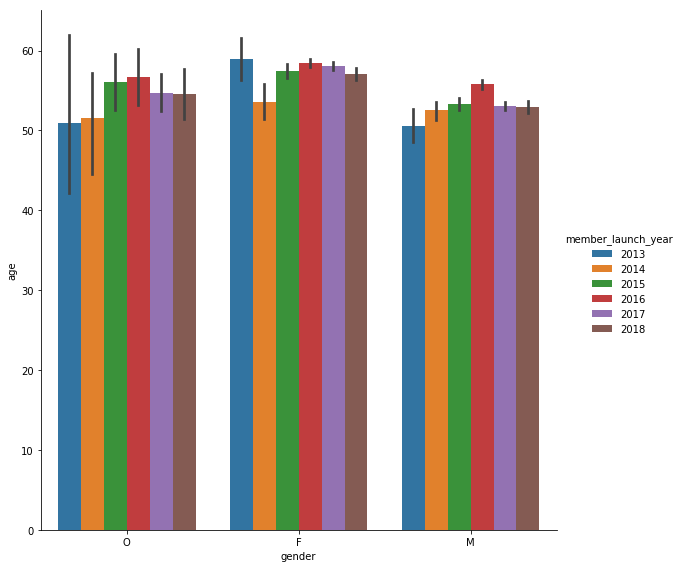

In [119]:
# We have now our Model data after final processing, and we can know now which offer is succsessed and which is not.
# We will do some visualization and statics for our Model data before navigation to the next steps:

successed_offers=model_data[model_data['success'] == 1]

#HUE=Combined_all_data[(Combined_all_data['offer_id'] != '0')&( Combined_all_data['event'] == 'offer completed')]['offer_id']
#Y=Combined_all_data[(Combined_all_data['offer_id'] != '0' )&( Combined_all_data['event'] == 'offer completed') ]['age']
#X=Combined_all_data[(Combined_all_data['offer_id'] != '0') & (Combined_all_data['event'] == 'offer completed')]['gender']
sns.factorplot(x='gender', y='age' , data=successed_offers, hue='member_launch_year',size=8,kind='bar', aspect=1)


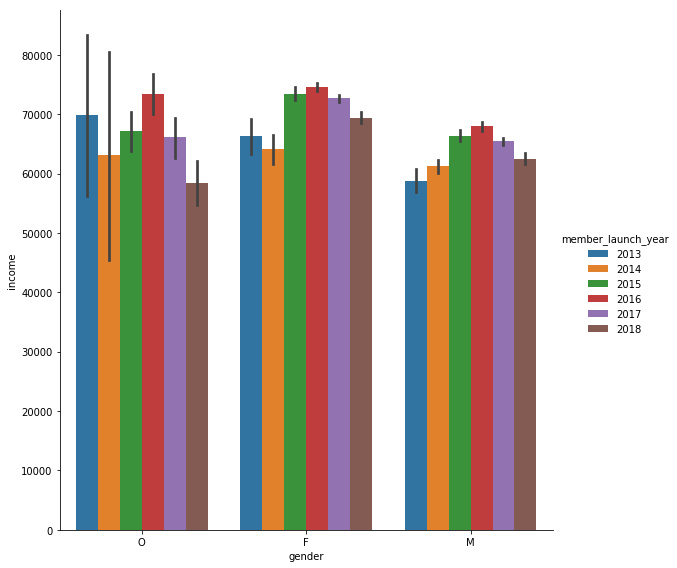

In [120]:
successed_offers=model_data[model_data['success'] == 1]

#HUE=Combined_all_data[(Combined_all_data['offer_id'] != '0')&( Combined_all_data['event'] == 'offer completed')]['offer_id']
#Y=Combined_all_data[(Combined_all_data['offer_id'] != '0' )&( Combined_all_data['event'] == 'offer completed') ]['age']
#X=Combined_all_data[(Combined_all_data['offer_id'] != '0') & (Combined_all_data['event'] == 'offer completed')]['gender']
sns.factorplot(x='gender', y='income' , data=successed_offers, hue='member_launch_year',size=8,kind='bar', aspect=1)

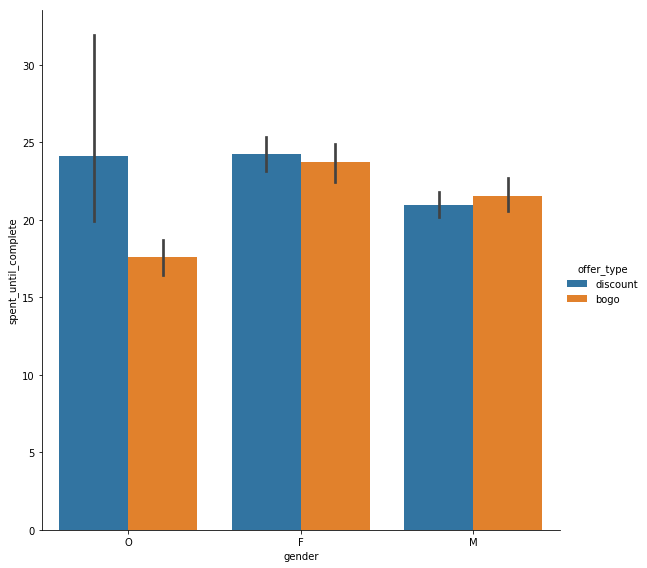

In [121]:
successed_offers=model_data[model_data['success'] == 1]

#HUE=Combined_all_data[(Combined_all_data['offer_id'] != '0')&( Combined_all_data['event'] == 'offer completed')]['offer_id']
#Y=Combined_all_data[(Combined_all_data['offer_id'] != '0' )&( Combined_all_data['event'] == 'offer completed') ]['age']
#X=Combined_all_data[(Combined_all_data['offer_id'] != '0') & (Combined_all_data['event'] == 'offer completed')]['gender']
sns.factorplot(x='gender', y='spent_until_complete' , data=successed_offers, hue='offer_type',size=8,kind='bar', aspect=1)

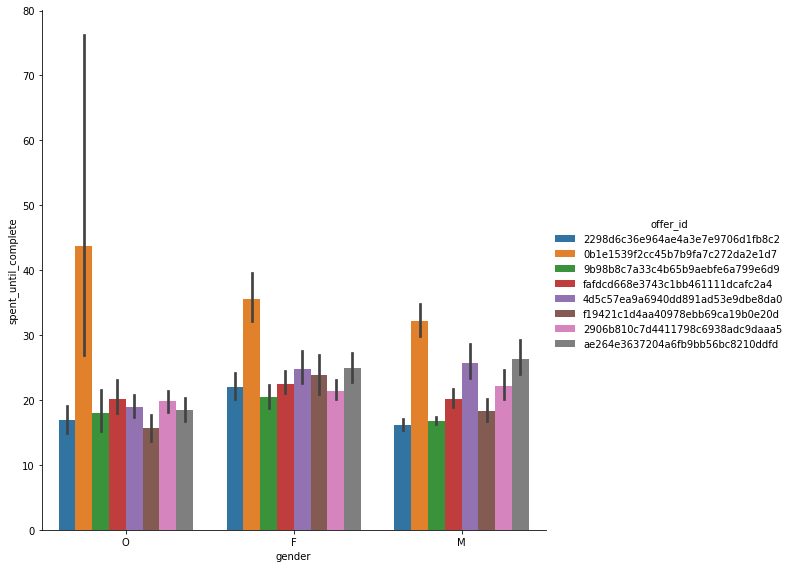

In [122]:
successed_offers=model_data[model_data['success'] == 1]

#HUE=Combined_all_data[(Combined_all_data['offer_id'] != '0')&( Combined_all_data['event'] == 'offer completed')]['offer_id']
#Y=Combined_all_data[(Combined_all_data['offer_id'] != '0' )&( Combined_all_data['event'] == 'offer completed') ]['age']
#X=Combined_all_data[(Combined_all_data['offer_id'] != '0') & (Combined_all_data['event'] == 'offer completed')]['gender']
sns.factorplot(x='gender', y='spent_until_complete' , data=successed_offers, hue='offer_id',size=8,kind='bar', aspect=1)

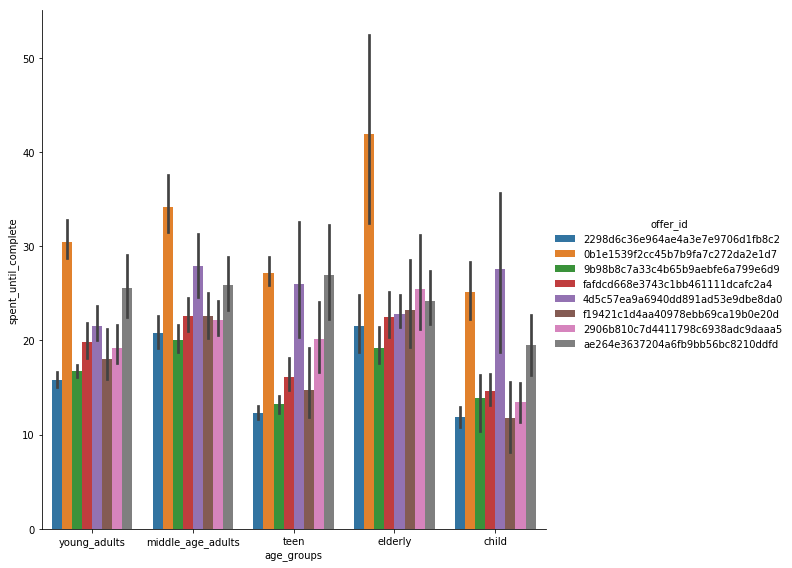

In [123]:
successed_offers=model_data[model_data['success'] == 1]

#HUE=Combined_all_data[(Combined_all_data['offer_id'] != '0')&( Combined_all_data['event'] == 'offer completed')]['offer_id']
#Y=Combined_all_data[(Combined_all_data['offer_id'] != '0' )&( Combined_all_data['event'] == 'offer completed') ]['age']
#X=Combined_all_data[(Combined_all_data['offer_id'] != '0') & (Combined_all_data['event'] == 'offer completed')]['gender']
sns.factorplot(x='age_groups', y='spent_until_complete' , data=successed_offers, hue='offer_id',size=8,kind='bar', aspect=1)

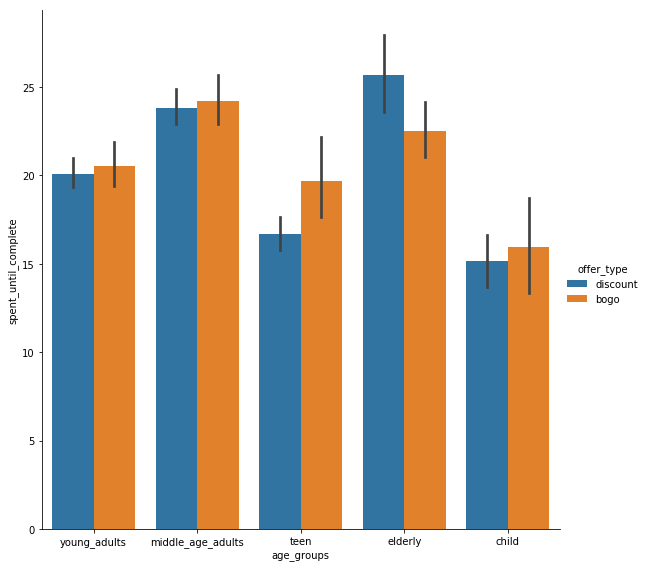

In [124]:
successed_offers=model_data[model_data['success'] == 1]

#HUE=Combined_all_data[(Combined_all_data['offer_id'] != '0')&( Combined_all_data['event'] == 'offer completed')]['offer_id']
#Y=Combined_all_data[(Combined_all_data['offer_id'] != '0' )&( Combined_all_data['event'] == 'offer completed') ]['age']
#X=Combined_all_data[(Combined_all_data['offer_id'] != '0') & (Combined_all_data['event'] == 'offer completed')]['gender']
sns.factorplot(x='age_groups', y='spent_until_complete' , data=successed_offers, hue='offer_type',size=8,kind='bar', aspect=1)

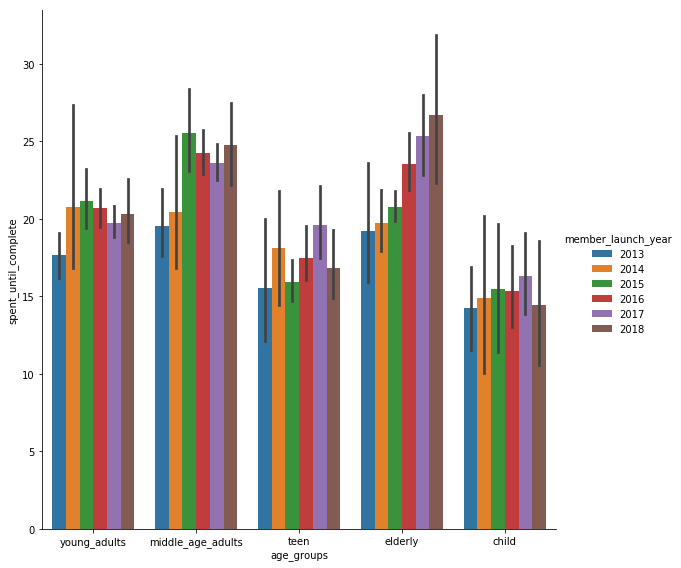

In [125]:
successed_offers=model_data[model_data['success'] == 1]
sns.factorplot(x='age_groups', y='spent_until_complete' , data=successed_offers, hue='member_launch_year',size=8,kind='bar', aspect=1)

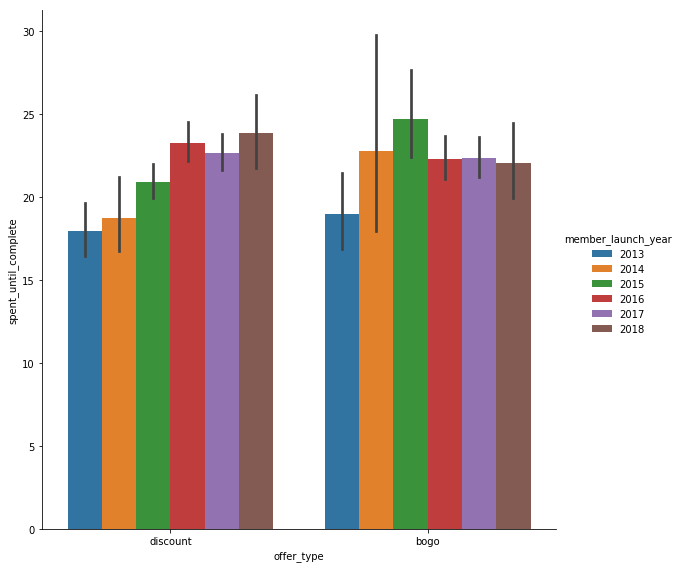

In [126]:
successed_offers=model_data[model_data['success'] == 1]
sns.factorplot(x='offer_type', y='spent_until_complete' , data=successed_offers, hue='member_launch_year',size=8,kind='bar', aspect=1)

In [137]:
data_gender_total = model_data[model_data['gender']!= 'NA'].groupby(['gender']).count()
data_gender_success = successed_offers[(successed_offers['gender']!= 'NA')].groupby(['gender']).count()



print('For Females:')
print("Number of offer Succeded: " + str(data_gender_success.loc[('F', 'success')]) + ' ' +
      str(round((data_gender_success.loc[('F', 'success')]/np.float(data_gender_total.loc[('F','success')]))*100,1)) + "% of Female received offers. ")
print("Number of offer Succeded: " + str(data_gender_success.loc[('F', 'success')]) + ' ' +
      str(round((data_gender_success.loc[('F', 'success')]/np.float(data_gender_total['success'].sum()))*100,1)) + "% of Total received offers. ")      
print('\nFor Males:')
print("Number of offer Succeded: " + str(data_gender_success.loc[('M', 'success')]) + ' ' + 
      str(round((data_gender_success.loc[('M', 'success')]/np.float(data_gender_total.loc[('M','success')]))*100,1)) + "% of Male received offers.")
print("Number of offer Succeded: " + str(data_gender_success.loc[('M', 'success')]) + ' ' +
      str(round((data_gender_success.loc[('M', 'success')]/np.float(data_gender_total['success'].sum()))*100,1)) + "% of Total received offers. ")

For Females:
Number of offer Succeded: 11107 40.5% of Female received offers. 
Number of offer Succeded: 11107 16.7% of Total received offers. 

For Males:
Number of offer Succeded: 12413 32.6% of Male received offers.
Number of offer Succeded: 12413 18.7% of Total received offers. 


In [147]:

data_spent_total = model_data[model_data['gender']!= 'NA'].groupby(['gender'])['spent_until_complete'].sum()
data_spent_success = successed_offers[(successed_offers['gender']!= 'NA')].groupby(['gender'])['spent_until_complete'].sum()
print('For Females:')
print("Total Spent until offer Complete: " + str(data_spent_success.loc[('F')]) + ' ' + 
      str(round((data_spent_success.loc[('F')]/data_spent_total.loc[('F')])*100,1)) + "% of Total Female received offers. ")
#print("Number of offer Succeded: " + str(data_spent_success.loc[('F')]) + ' ' + str(round((data_spent_success.loc[('F')]/data_gender_total['spent_until_complete'].sum())*100,1)) + "% of Total received offers. ")      
print('\nFor Males:')
print("Total Spent until offer Complete: " + str(data_spent_success.loc[('M')]) + ' ' + 
      str(round((data_spent_success.loc[('M')]/data_spent_total.loc[('M')])*100,1)) + "% of Total Male received offers. ")
#print("Number of offer Succeded: "+ str(data_gender_success.loc[('F', 'success')]) + ' ' + str(round((data_gender_success.loc[('M', 'success')]/np.float(data_gender_total['success'].sum()))*100,1)) + "% of Total received offers. ")

For Females:
Total Spent until offer Complete: 266395.9199999997 53.8% of Total Female received offers. 

For Males:
Total Spent until offer Complete: 263321.7999999994 50.6% of Total Male received offers. 


In [155]:
data_spent_total = model_data[model_data['gender']!= 'NA'].groupby(['gender'])['spent_until_complete'].sum()
data_spent_success = successed_offers[(successed_offers['gender']!= 'NA')].groupby(['gender'])['spent_until_complete'].sum()
print('For Females:')
print("Total Spent until offer Complete: " + str(data_spent_success.loc[('F')]) + ' ' +
      str(round((data_spent_success.loc[('F')]/data_spent_total.sum())*100,1)) + "% of Total  received offers. ")
#print("Number of offer Succeded: " + str(data_spent_success.loc[('F')]) + ' ' +str(round((data_spent_success.loc[('F')]/data_gender_total['spent_until_complete'].sum())*100,1)) + "% of Total received offers. ")      
print('\nFor Males:')
print("Total Spent until offer Complete: " + str(data_spent_success.loc[('M')]) + ' ' +
      str(round((data_spent_success.loc[('M')]/data_spent_total.sum())*100,1)) + "% of Total  received offers. ")
#print("Number of offer Succeded: " + str(data_gender_success.loc[('F', 'success')])  + ' ' + str(round((data_gender_success.loc[('M', 'success')]/np.float(data_gender_total['success'].sum()))*100,1)) + "% of Total received offers. ")

For Females:
Total Spent until offer Complete: 266395.9199999997 25.9% of Total  received offers. 

For Males:
Total Spent until offer Complete: 263321.7999999994 25.6% of Total  received offers. 


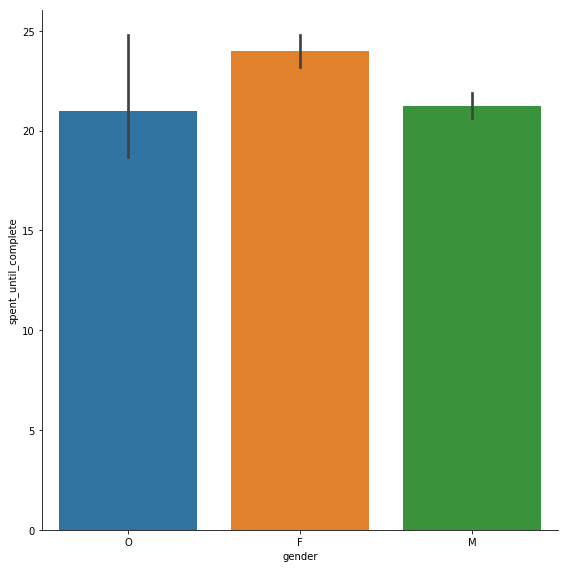

In [156]:
successed_offers=model_data[model_data['success'] == 1]

#HUE=Combined_all_data[(Combined_all_data['offer_id'] != '0')&( Combined_all_data['event'] == 'offer completed')]['offer_id']
#Y=Combined_all_data[(Combined_all_data['offer_id'] != '0' )&( Combined_all_data['event'] == 'offer completed') ]['age']
#X=Combined_all_data[(Combined_all_data['offer_id'] != '0') & (Combined_all_data['event'] == 'offer completed')]['gender']
sns.factorplot(x='gender', y='spent_until_complete' , data=successed_offers,size=8,kind='bar', aspect=1)

In [157]:
gender_dummies=pd.get_dummies(model_data['gender'])
offer_type_dummies=pd.get_dummies(model_data['offer_type'])
offer_id_dummies=pd.get_dummies(model_data['offer_id'])
age_groups_dummies=pd.get_dummies(model_data['age_groups'])
member_launch_year_dummies=pd.get_dummies(model_data['member_launch_year'])

In [158]:
modeled_data=pd.concat([model_data,gender_dummies,offer_type_dummies,offer_id_dummies,age_groups_dummies,member_launch_year_dummies],axis=1)

In [159]:
modeled_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66501 entries, 0 to 66500
Data columns (total 55 columns):
event                               66501 non-null object
customer                            66501 non-null object
time                                66501 non-null int64
offer_id                            66501 non-null object
amount                              66501 non-null float64
age                                 66501 non-null int64
became_member_on                    66501 non-null datetime64[ns]
gender                              66501 non-null object
income                              66501 non-null float64
age_groups                          66501 non-null object
member_launch_Cum_days              66501 non-null int64
member_launch_year                  66501 non-null int64
difficulty                          66501 non-null float64
duration                            66501 non-null float64
offer_type                          66501 non-null object
reward       

In [160]:
static_data5=modeled_data

In [168]:
# Showing the Top Customers

TOP_Customers = modeled_data[(modeled_data['success'] == 1)].groupby(['customer', 'success'])['spent_until_complete'].sum().reset_index()
TOP_Customers = TOP_Customers.sort_values('spent_until_complete', ascending=False).head(10)
count = 1


print('                    TOP-10 Customers              ')
for i, item in TOP_Customers.iterrows():
    print('[ #' + str(count)+ ' ]')
    print('Person: ' + str(item["customer"]) + ' ')
    print('Number of Success Offers:       ' + 
          str(modeled_data[(modeled_data["customer"] == item["customer"]) & (modeled_data["success"] == 1)].shape[0]) + '      offers')
    print('Spent until complete:                  $' + str(round(item["spent_until_complete"],0)) + '        ')
    
    count += 1

                    TOP-10 Customers              
[ #1 ]
Person: 0cc6e8553c844c02ab525bc466aa569b 
Number of Success Offers:       4      offers
Spent until complete:                  $1754.0        
[ #2 ]
Person: 2fc5fa0b50f944e398b903b0be851678 
Number of Success Offers:       3      offers
Spent until complete:                  $1532.0        
[ #3 ]
Person: 8d31a8a4b5d24b10a54da118855f7132 
Number of Success Offers:       4      offers
Spent until complete:                  $1489.0        
[ #4 ]
Person: a2633655a62e4287a3b651d926a774a6 
Number of Success Offers:       6      offers
Spent until complete:                  $1439.0        
[ #5 ]
Person: e72ad19d4f6c4827b69b55c5e3a55bba 
Number of Success Offers:       4      offers
Spent until complete:                  $1271.0        
[ #6 ]
Person: 4d4216b868fe43ddb9c9f0b77212c0cb 
Number of Success Offers:       6      offers
Spent until complete:                  $1164.0        
[ #7 ]
Person: bfce6d50205a4f6982d87ce80e5d5356 


In [169]:
# Dropping the unneeded Columns from the Modeled Data Set

modeled_data = modeled_data.drop(["customer", "event", "age","amount","offer_id","gender","became_member_on",
                                  "age_groups","member_launch_year","offer_type",
                                  "viewed","completed","finish"
                                 ], axis=1)

In [170]:
modeled_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66501 entries, 0 to 66500
Data columns (total 42 columns):
time                                66501 non-null int64
income                              66501 non-null float64
member_launch_Cum_days              66501 non-null int64
difficulty                          66501 non-null float64
duration                            66501 non-null float64
reward                              66501 non-null float64
web                                 66501 non-null float64
email                               66501 non-null float64
mobile                              66501 non-null float64
social                              66501 non-null float64
forecast_finish                     66501 non-null float64
success                             66501 non-null int64
viewing_time                        66501 non-null int64
spent_in_duration                   66501 non-null float64
spent_until_complete                66501 non-null float64
F             

In [171]:
# Make data Normalization for the Modeled Data

from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
static_data7=modeled_data
modeled_data[['time','income','difficulty','duration','reward','forecast_finish','spent_until_complete','spent_in_duration','viewing_time','member_launch_Cum_days']] = mms.fit_transform(modeled_data[['time','income','difficulty','duration','reward','forecast_finish','spent_until_complete','spent_in_duration','viewing_time','member_launch_Cum_days']])

/home/ec2-user/anaconda3/envs/amazonei_mxnet_p27/lib/python2.7/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


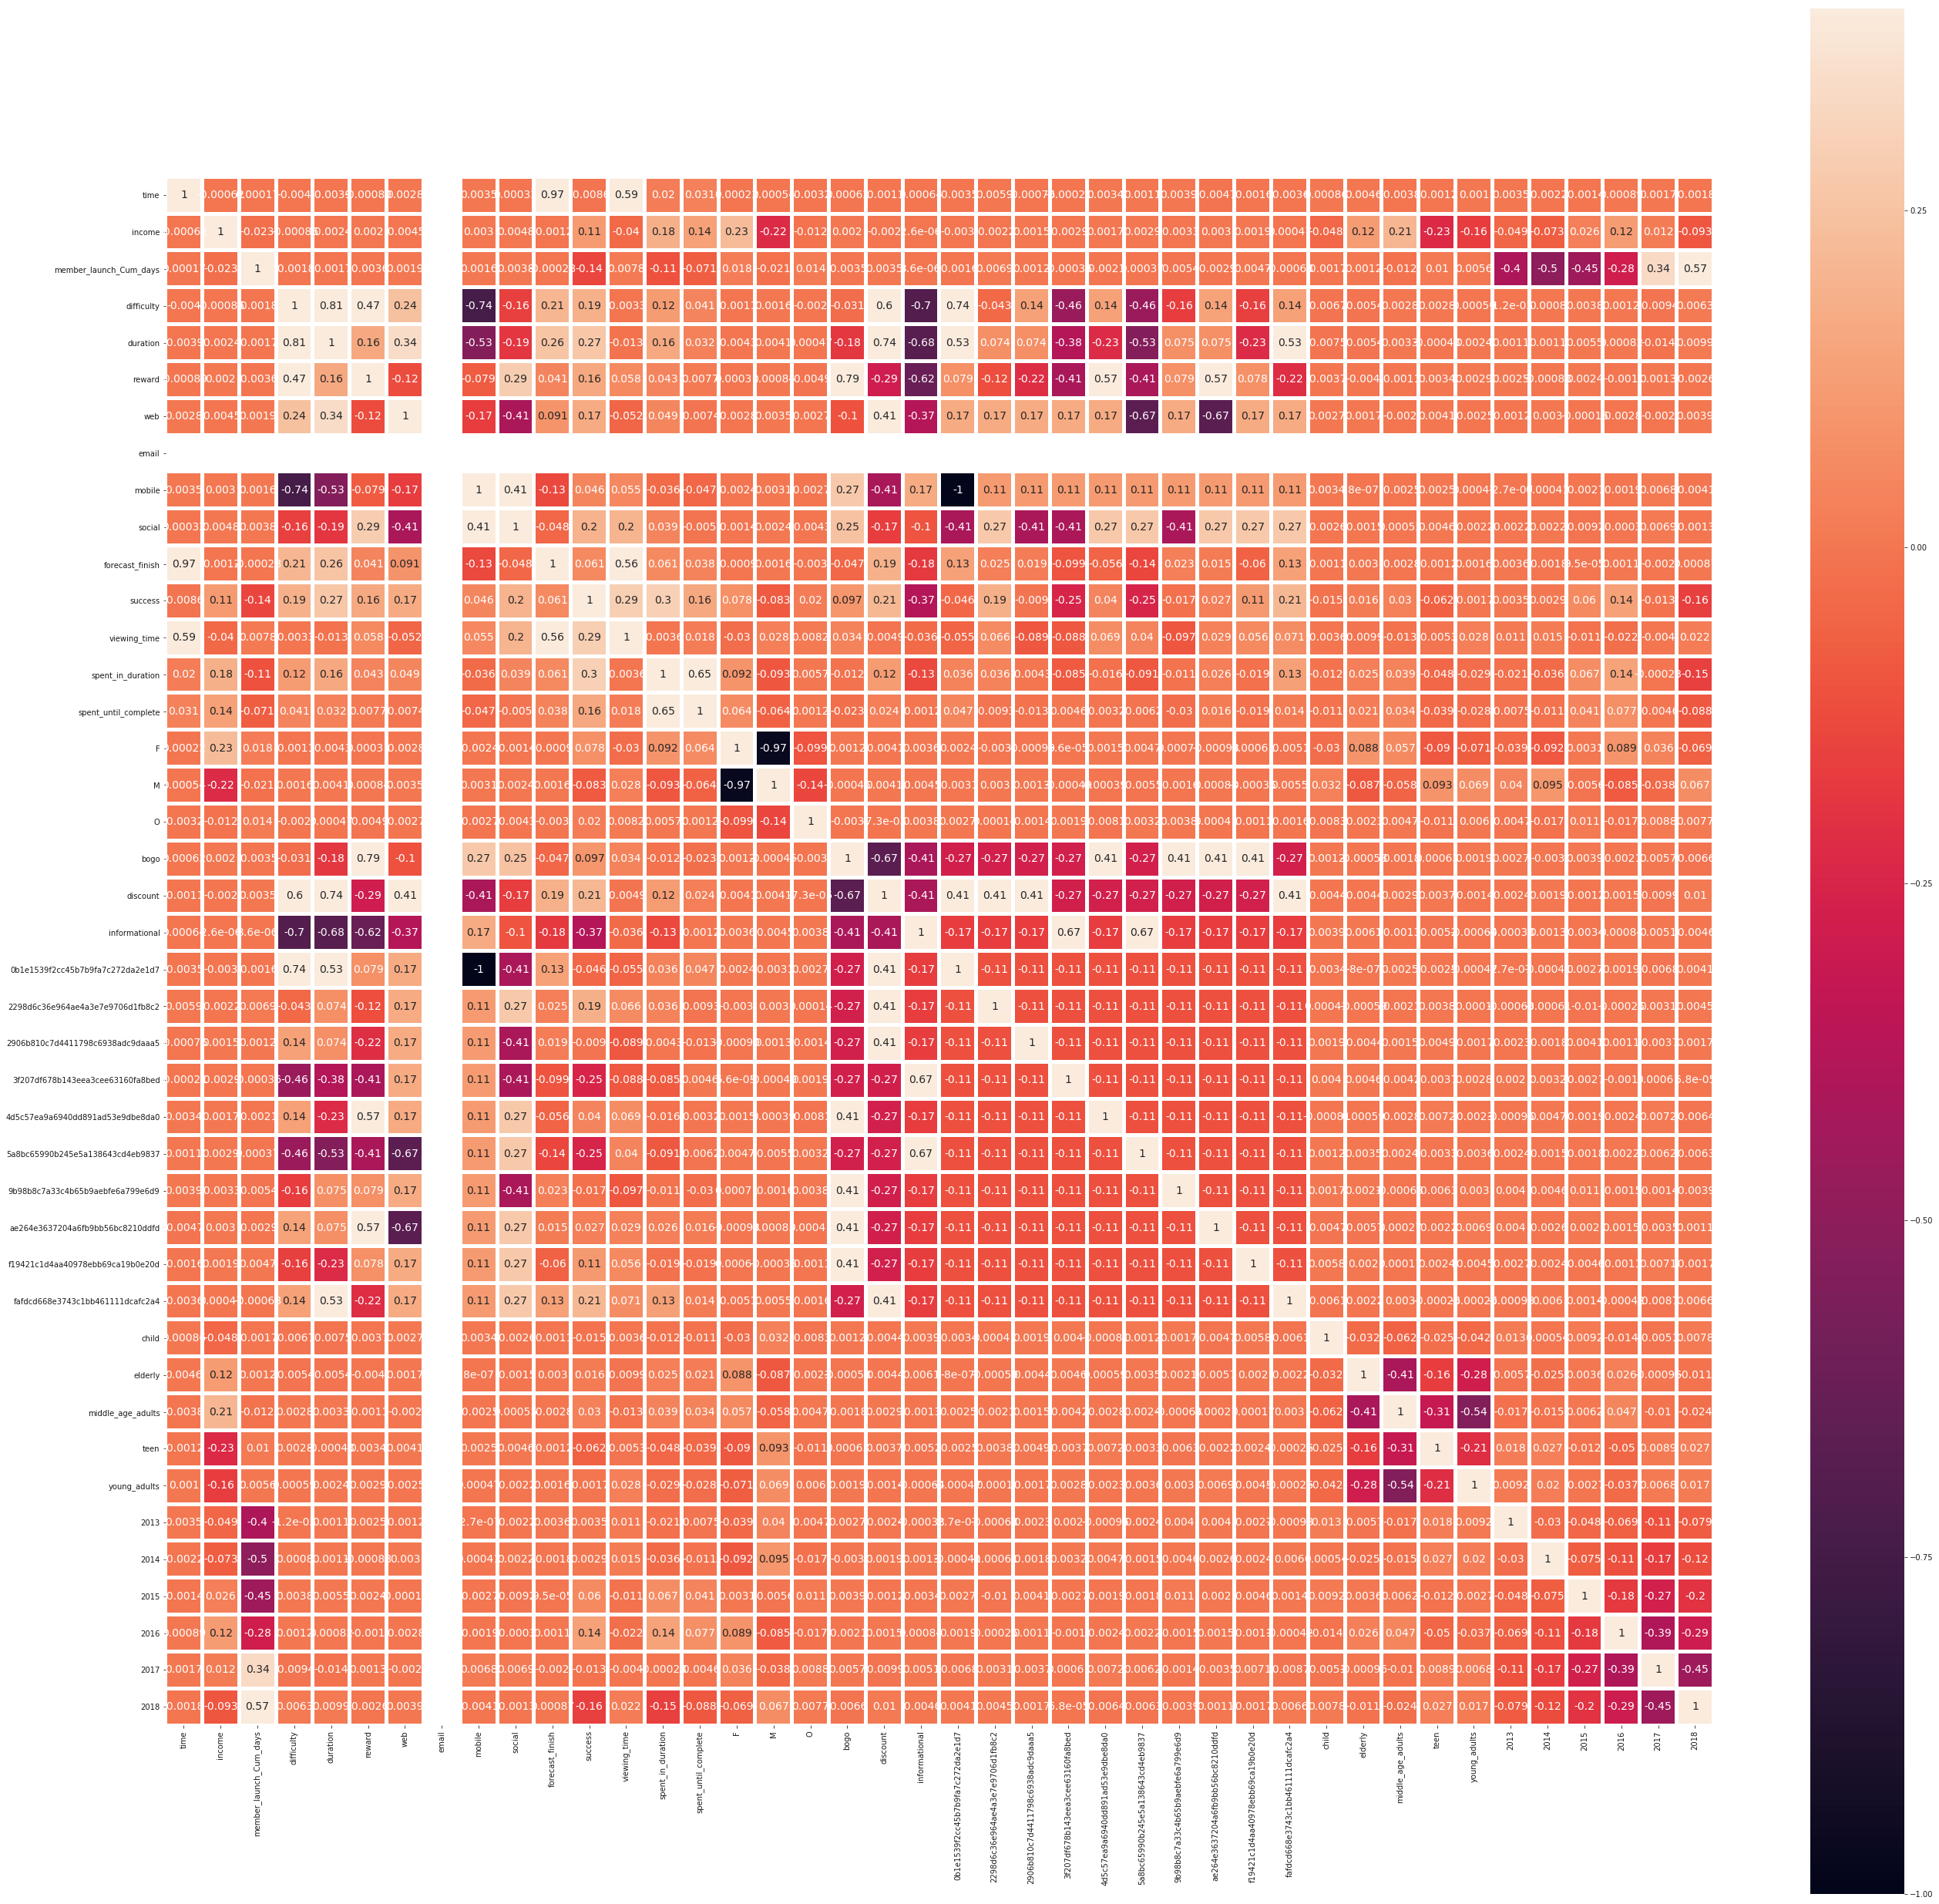

In [172]:
import seaborn as sb
C_mat = modeled_data.corr()
fig = plt.figure(figsize = (45,45))
sb.heatmap(C_mat, vmax = 0.4,annot=True, square = True,annot_kws={'size':14},cbar=True,linewidths=4)
sb.set(font_scale=4)
plt.show()

In [173]:
# getting the best features for the modelled data

#Correlation with output variable
cor_target = abs(C_mat["success"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.15].sort_values()
relevant_features

spent_until_complete                0.155922
2018                                0.158226
reward                              0.163495
web                                 0.167122
2298d6c36e964ae4a3e7e9706d1fb8c2    0.186246
difficulty                          0.190465
social                              0.197064
discount                            0.209410
fafdcd668e3743c1bb461111dcafc2a4    0.210728
5a8bc65990b245e5a138643cd4eb9837    0.249718
3f207df678b143eea3cee63160fa8bed    0.250011
duration                            0.265026
viewing_time                        0.291399
spent_in_duration                   0.299669
informational                       0.374796
success                             1.000000
Name: success, dtype: float64

In [174]:
# Shuffling the Modeled data and specifying the features and the labels

from sklearn.utils import shuffle

def prepare_Modeled_data(data):
    """Shuffling data."""
    data_train = data.loc[:, data.columns != 'success']
    labels_train = data['success']
 
    
    #Shuffle reviews and corresponding labels within training and test sets
    data_train, labels_train = shuffle(data_train, labels_train)
    
    return data_train, labels_train

In [175]:
features, labels=prepare_Modeled_data(modeled_data)

In [176]:
modeled_data.info(0)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66501 entries, 0 to 66500
Data columns (total 42 columns):
time                                66501 non-null float64
income                              66501 non-null float64
member_launch_Cum_days              66501 non-null float64
difficulty                          66501 non-null float64
duration                            66501 non-null float64
reward                              66501 non-null float64
web                                 66501 non-null float64
email                               66501 non-null float64
mobile                              66501 non-null float64
social                              66501 non-null float64
forecast_finish                     66501 non-null float64
success                             66501 non-null int64
viewing_time                        66501 non-null float64
spent_in_duration                   66501 non-null float64
spent_until_complete                66501 non-null float64
F       

In [177]:
# Dividing the Modeled data to train set , test set and validation set

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features,labels, 
                                                        test_size=0.20, 
                                                        random_state=42)

# Then we split the training set further into 2/3 training and 1/3 validation sets.
X_train, X_val, y_train, Y_val = train_test_split(X_train, y_train, test_size=0.33)

In [178]:
# we have following features as Shown below:
X_train.info(0)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35644 entries, 28151 to 14819
Data columns (total 41 columns):
time                                35644 non-null float64
income                              35644 non-null float64
member_launch_Cum_days              35644 non-null float64
difficulty                          35644 non-null float64
duration                            35644 non-null float64
reward                              35644 non-null float64
web                                 35644 non-null float64
email                               35644 non-null float64
mobile                              35644 non-null float64
social                              35644 non-null float64
forecast_finish                     35644 non-null float64
viewing_time                        35644 non-null float64
spent_in_duration                   35644 non-null float64
spent_until_complete                35644 non-null float64
F                                   35644 non-null uint8
M   

In [179]:
#we have one Label (Success)as Shown below:
y_train.describe()

count    35644.000000
mean         0.357031
std          0.479131
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: success, dtype: float64

# 5. Assigning the Benchmark Model and Evaluation Metrics

We will use Logistic regression model as a Benchmark in which to compare our models ‘s performance to , because it is fast and simple to implement.
<br><br>We will implement the roc_auc_score , Precision and Recall Metrics to Compare other Models ‘s Results.

In [180]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.metrics import roc_auc_score
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred_LOG = classifier.predict(X_test)

print( 'roc_auc_score:' , roc_auc_score(y_test, y_pred_LOG))
print('Precision Metric:',precision_score(y_test, y_pred_LOG))
print('Recall Metric:',recall_score(y_test, y_pred_LOG))

/home/ec2-user/anaconda3/envs/amazonei_mxnet_p27/lib/python2.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


('roc_auc_score:', 0.85317637023094)
('Precision Metric:', 0.8188451115280384)
('Recall Metric:', 0.8092295014421096)


# 6.Training Models and Evaluation

The List of Models to be used in our Problem Solution: 1-Amazon Sage maker XG-Boost built in Algorithm. 2-LightGBM Model. 3-CatBoost Model 4-Random Forest Classifier 5-Decision Tree Classifier 6-K-neighbors Classifier

## 6.1 Random Forest Classifier

In [181]:
from sklearn.ensemble import RandomForestClassifier
import math
rf = RandomForestClassifier(max_depth=10, random_state=0)

rf.fit(X_train, y_train)
y_pred_RF = rf.predict(X_test)
print( 'roc_auc_score:' , roc_auc_score(y_test, np.around(y_pred_RF)))
print('Precision Metric:',precision_score(y_test, np.around(y_pred_RF)))
print('Recall Metric:',recall_score(y_test, np.around(y_pred_RF)))

#print(accuracy_score(y_test, np.around(y_pred_RF)))
#print(confusion_matrix(y_test, np.around(y_pred_RF)))
#print('-'*100)
#print(classification_report(y_test, np.around(y_pred_RF)))

/home/ec2-user/anaconda3/envs/amazonei_mxnet_p27/lib/python2.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


('roc_auc_score:', 0.9702503342663181)
('Precision Metric:', 0.9492140266021766)
('Recall Metric:', 0.9703337453646477)


Text(0.5,1,'Random Forest Estimated Feature Importance')

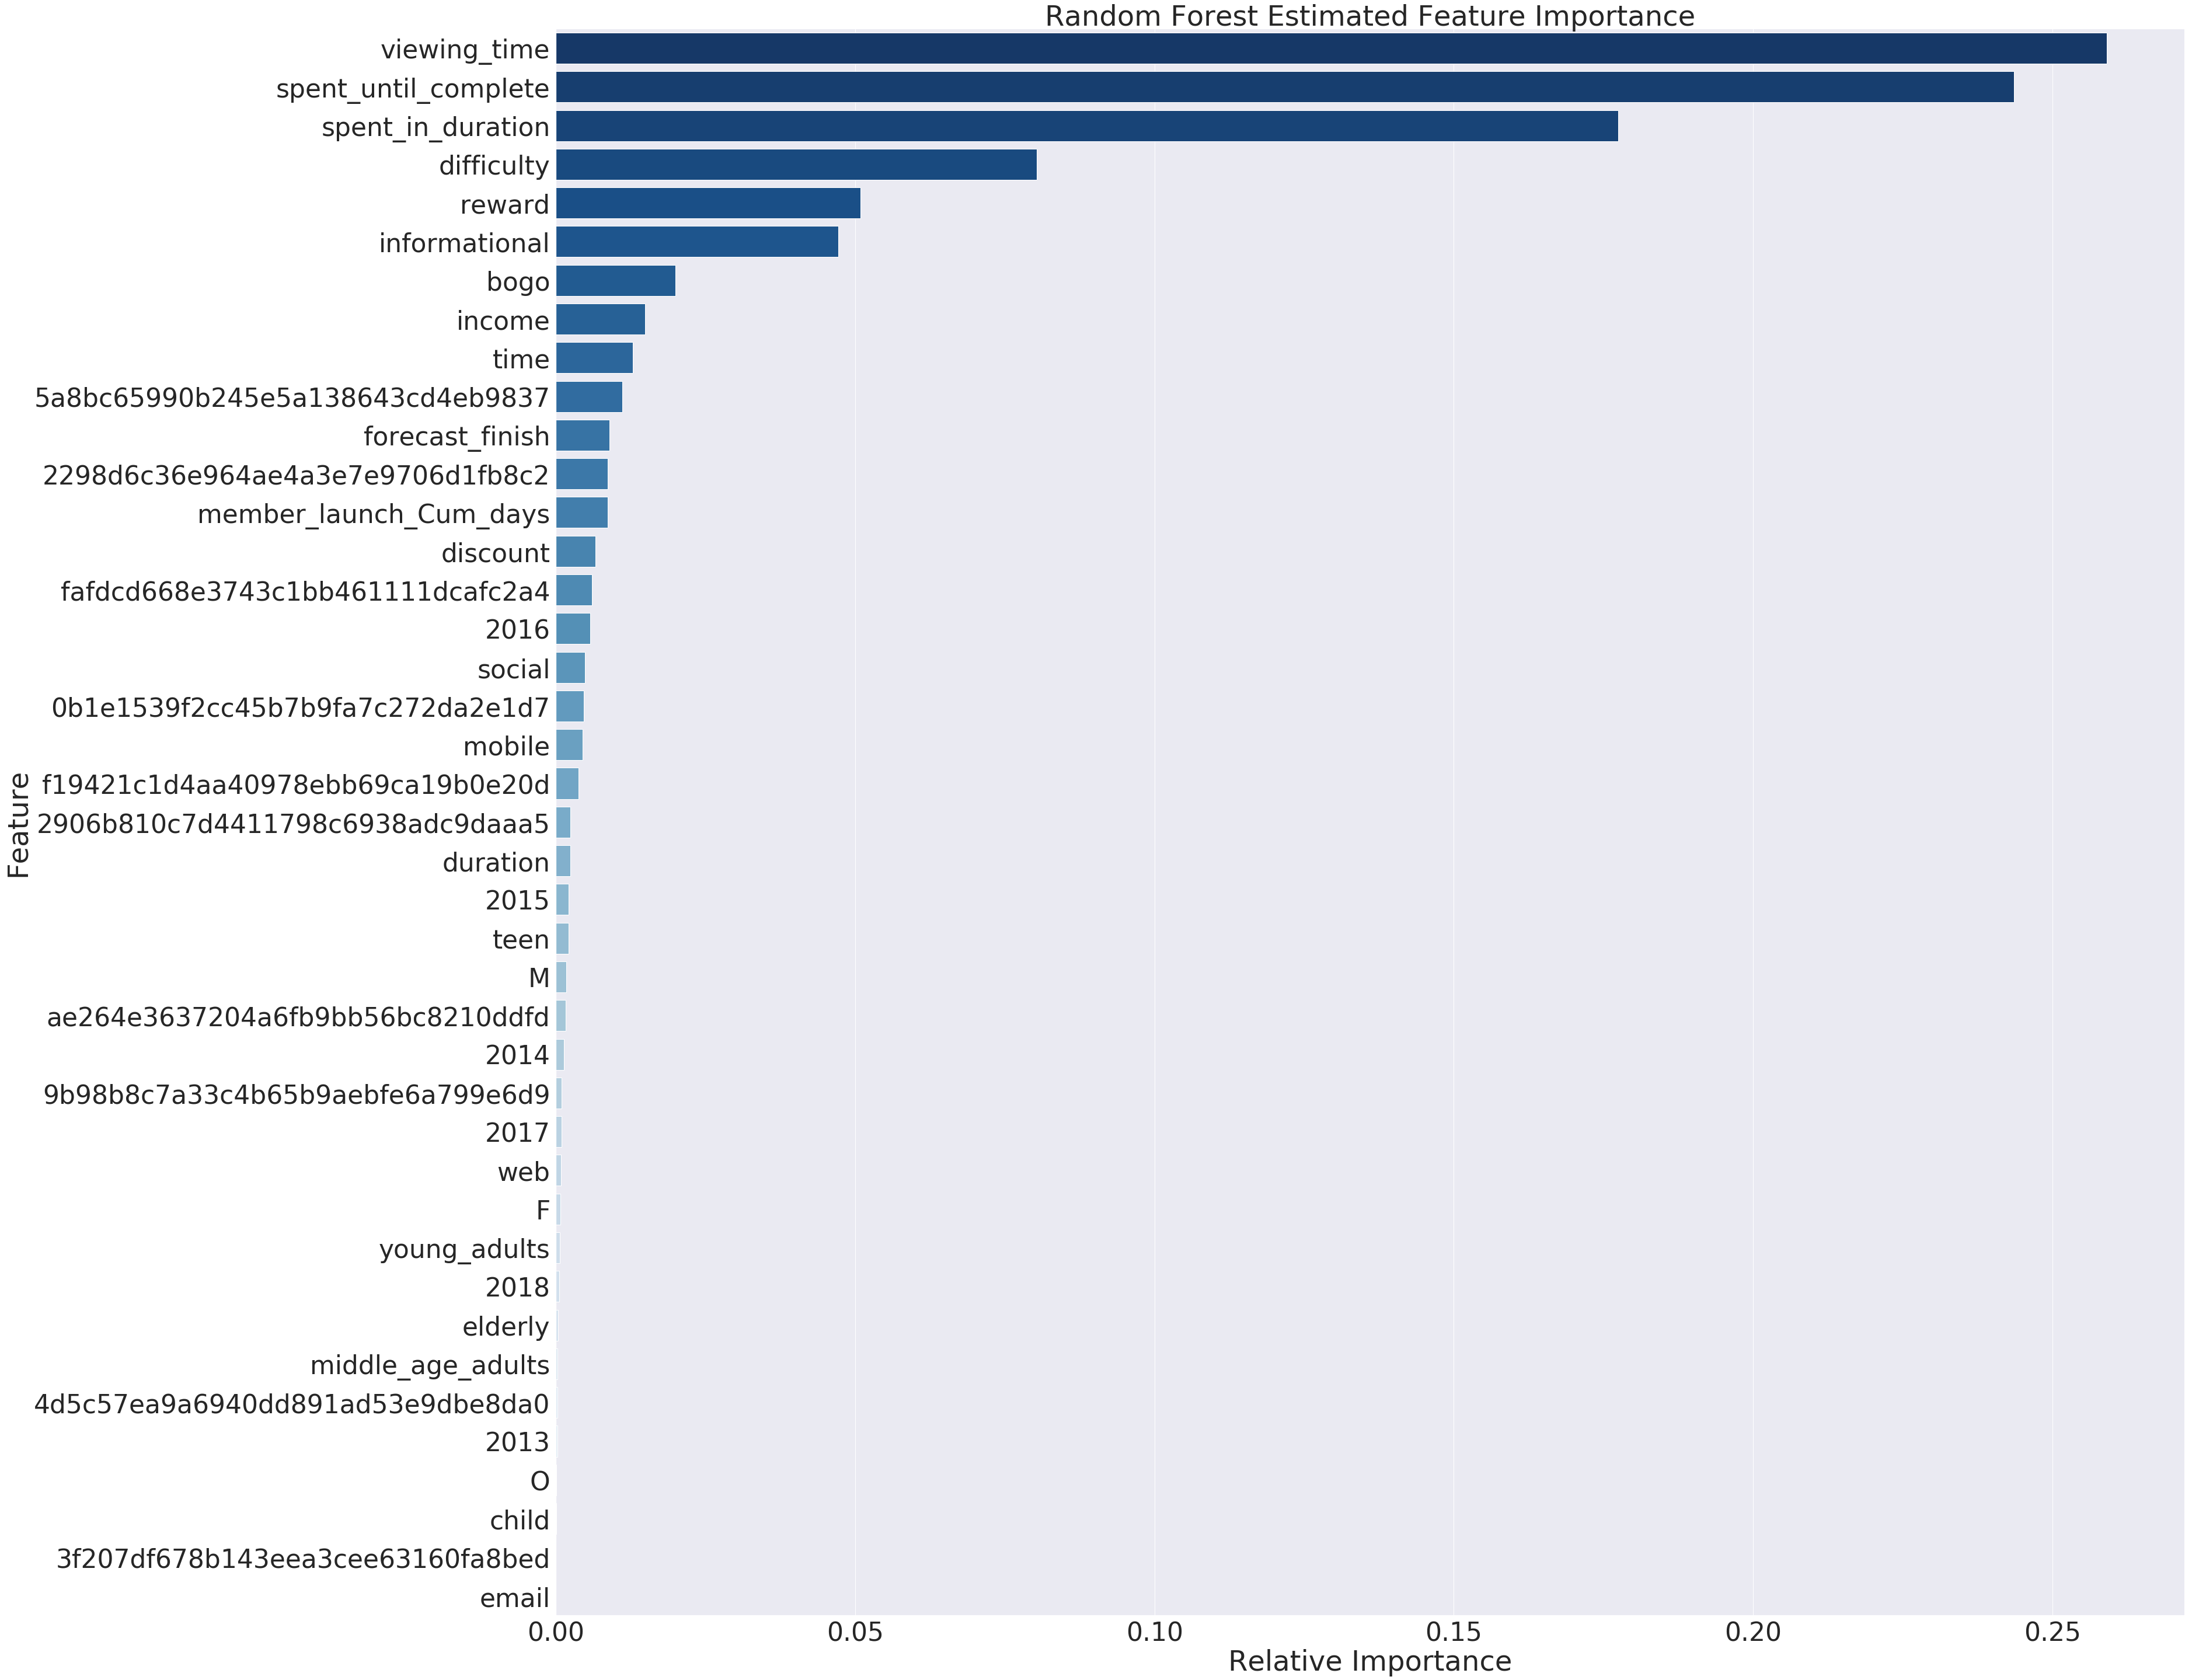

In [191]:
#Features importance
relative_importance = rf.feature_importances_
relative_importance = relative_importance / np.sum(relative_importance)

feature_importance =\
    pd.DataFrame(list(zip(X_train.columns,
                          relative_importance)),
                 columns=['feature', 'relativeimportance'])

feature_importance = feature_importance.sort_values('relativeimportance',
                                                    ascending=False)

feature_importance = feature_importance.reset_index(drop=True)

palette = sns.color_palette("Blues_r", feature_importance.shape[0])

plt.figure(figsize=(50, 50))
sns.barplot(x='relativeimportance',
            y='feature',
            data=feature_importance,
            palette=palette)
plt.xlabel('Relative Importance')
plt.ylabel('Feature')
plt.title('Random Forest Estimated Feature Importance')

## 6.2 Decision Tree Classifier

In [193]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()

dt.fit(X_train, y_train)
y_pred_tree = dt.predict(X_test)
print( 'roc_auc_score:' , roc_auc_score(y_test, y_pred_tree))
print('Precision Metric:',precision_score(y_test, y_pred_tree))
print('Recall Metric:',recall_score(y_test, y_pred_tree))

#print(accuracy_score(y_test, y_pred_tree))
#print(confusion_matrix(y_test, y_pred_tree))
#print('-'*100)
#print(classification_report(y_test, y_pred_tree))

('roc_auc_score:', 0.9617122693677033)
('Precision Metric:', 0.9550165837479271)
('Recall Metric:', 0.9491141326740832)


## 6.3 K-neighbors Classifier

In [194]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

knn.fit(X_train, y_train)
# Predicting the Test set results
y_pred_knn = knn.predict(X_test)

print( 'roc_auc_score:' , roc_auc_score(y_test, y_pred_knn))
print('Precision Metric:',precision_score(y_test, y_pred_knn))
print('Recall Metric:',recall_score(y_test, y_pred_knn))

#print(accuracy_score(y_test, y_pred_knn))
#print(confusion_matrix(y_test, y_pred_knn))
#print('-'*100)
#print(classification_report(y_test, y_pred_knn))

('roc_auc_score:', 0.7807964262392975)
('Precision Metric:', 0.7175152749490835)
('Recall Metric:', 0.7257931602801813)


## 6.4 Amazon Sage maker XG-Boost built in Algorithm

In [195]:
# Our current execution role is require when creating the model as the training
# and inference code will need to access the model artifacts.
import boto3
import sagemaker
from sagemaker import get_execution_role

No handlers could be found for logger "sagemaker"


In [196]:
#we need to import the various bits of SageMaker that we will be using.
import os

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.datasets import load_boston
import sklearn.model_selection

import sagemaker
from sagemaker import get_execution_role
from sagemaker.amazon.amazon_estimator import get_image_uri
from sagemaker.predictor import csv_serializer

data_dir = '../data/starbuks_capstone'
if not os.path.exists(data_dir):
    os.makedirs(data_dir)

In [197]:
# We use pandas to save our test, train and validation data to csv files. Note that we make sure not to include header
# information or an index as this is required by the built in algorithms provided by Amazon. Also, for the train and
# validation data, it is assumed that the first entry in each row is the target variable.
X_test.to_csv(os.path.join(data_dir, 'test.csv'), header=False, index=False)

pd.concat([Y_val, X_val], axis=1).to_csv(os.path.join(data_dir, 'validation.csv'), header=False, index=False)
pd.concat([y_train, X_train], axis=1).to_csv(os.path.join(data_dir, 'train.csv'), header=False, index=False)

In [198]:
# This is an object that represents the SageMaker session that we are currently operating in. This
# object contains some useful information that we will need to access later such as our region.
session = sagemaker.Session()

# This is an object that represents the IAM role that we are currently assigned. When we construct
# and launch the training job later we will need to tell it what IAM role it should have. Since our
# use case is relatively simple we will simply assign the training job the role we currently have.
role = get_execution_role()
prefix = 'starbucks-capstone-xgboost'

test_location = session.upload_data(os.path.join(data_dir, 'test.csv'), key_prefix=prefix)
val_location = session.upload_data(os.path.join(data_dir, 'validation.csv'), key_prefix=prefix)
train_location = session.upload_data(os.path.join(data_dir, 'train.csv'), key_prefix=prefix)

In [199]:
# As stated above, we use this utility method to construct the image name for the training container.
container = get_image_uri(session.boto_region_name, 'xgboost','0.90-1')

xgb = sagemaker.estimator.Estimator(container, # The location of the container we wish to use
                                    role,                                    # What is our current IAM Role
                                    train_instance_count=1,                  # How many compute instances
                                    train_instance_type='ml.m4.xlarge',      # What kind of compute instances
                                    output_path='s3://{}/{}/output'.format(session.default_bucket(), prefix),
                                    sagemaker_session=session)

# And then set the algorithm specific parameters.
xgb.set_hyperparameters(max_depth=2,
                        eta=0.02,
                        gamma=2.6,
                        min_child_weight=2,
                        subsample=0.65,
                        silent=0,
                    #    alpha=1.5,
                     #   colsample_bylevel=0.5,
                      #  colsample_bynode=0.5,
                       # colsample_bytree=0.5,
                        max_delta_step=3,
                        objective='binary:logistic',
                        early_stopping_rounds=100,
                        num_round=500)

In [200]:
#Hyper parametrer tuning
# First, make sure to import the relevant objects used to construct the tuner
from sagemaker.tuner import IntegerParameter, ContinuousParameter, HyperparameterTuner


xgb_hyperparameter_tuner = HyperparameterTuner(estimator = xgb, # The estimator object to use as the basis for the training jobs.
                                               objective_metric_name = 'validation:auc', # The metric used to compare trained models.
                                               objective_type = 'Maximize', # Whether we wish to minimize or maximize the metric.
                                               max_jobs = 6, # The total number of models to train
                                               max_parallel_jobs = 3, # The number of models to train in parallel
                                               hyperparameter_ranges = {
                                                    'max_depth': IntegerParameter(2, 4),
                                                    
                                                    'eta'      : ContinuousParameter(0.02, 0.04),
                                                  #  'colsample_bylevel'      : ContinuousParameter(0.1, 1),
                                                   # 'colsample_bynode'      : ContinuousParameter(0.1, 1),
                                                    #'colsample_bytree'      : ContinuousParameter(0.1, 1),
                                                    #'max_delta_step': IntegerParameter(1, 3),
                                                   
                                                    #'alpha'      : ContinuousParameter(1.1,1.6),
                                                    'min_child_weight': IntegerParameter(1, 2),
                                                    'num_round': IntegerParameter(400, 700),
                                                    'subsample': ContinuousParameter(0.71, 0.73),
                                                    'gamma': ContinuousParameter(3.60, 3.65),
                                               })

In [201]:
# This is a wrapper around the location of our train and validation data, to make sure that SageMaker
# knows our data is in csv format.
s3_input_train = sagemaker.s3_input(s3_data=train_location, content_type='csv')
s3_input_validation = sagemaker.s3_input(s3_data=val_location, content_type='csv')

xgb_hyperparameter_tuner.fit({'train': s3_input_train, 'validation': s3_input_validation})

In [202]:
xgb_hyperparameter_tuner.wait()

................................................................................................................!


In [203]:
xgb_attached = sagemaker.estimator.Estimator.attach(xgb_hyperparameter_tuner.best_training_job())

2020-10-31 14:52:37 Starting - Preparing the instances for training
2020-10-31 14:52:37 Downloading - Downloading input data
2020-10-31 14:52:37 Training - Training image download completed. Training in progress.
2020-10-31 14:52:37 Uploading - Uploading generated training model
2020-10-31 14:52:37 Completed - Training job completedINFO:sagemaker-containers:Imported framework sagemaker_xgboost_container.training
INFO:sagemaker-containers:Failed to parse hyperparameter _tuning_objective_metric value validation:auc to Json.
Returning the value itself
INFO:sagemaker-containers:Failed to parse hyperparameter objective value binary:logistic to Json.
Returning the value itself
INFO:sagemaker-containers:No GPUs detected (normal if no gpus installed)
INFO:sagemaker_xgboost_container.training:Running XGBoost Sagemaker in algorithm mode
INFO:root:Determined delimiter of CSV input is ','
INFO:root:Determined delimiter of CSV input is ','
INFO:root:Determined delimiter of CSV input is ','
[14:52:0

In [204]:
xgb_transformer = xgb_attached.transformer(instance_count = 1, instance_type = 'ml.m4.xlarge')

In [205]:
xgb_transformer.transform(test_location, content_type='text/csv', split_type='Line')

In [206]:
xgb_transformer.wait()

.............................2020/10/31 15:02:01 [crit] 14#14: *1 connect() to unix:/tmp/gunicorn.sock failed (2: No such file or directory) while connecting to upstream, client: 169.254.255.130, server: , request: "GET /ping HTTP/1.1", upstream: "http://unix:/tmp/gunicorn.sock:/ping", host: "169.254.255.131:8080"
169.254.255.130 - - [31/Oct/2020:15:02:01 +0000] "GET /ping HTTP/1.1" 502 182 "-" "Go-http-client/1.1"
2020/10/31 15:02:01 [crit] 14#14: *3 connect() to unix:/tmp/gunicorn.sock failed (2: No such file or directory) while connecting to upstream, client: 169.254.255.130, server: , request: "GET /ping HTTP/1.1", upstream: "http://unix:/tmp/gunicorn.sock:/ping", host: "169.254.255.131:8080"
169.254.255.130 - - [31/Oct/2020:15:02:01 +0000] "GET /ping HTTP/1.1" 502 182 "-" "Go-http-client/1.1"
[2020-10-31 15:02:01 +0000] [13] [INFO] Starting gunicorn 19.10.0
[2020-10-31 15:02:01 +0000] [13] [INFO] Listening at: unix:/tmp/gunicorn.sock (13)
[2020-10-31 15:02:01 +0000] [13] [INFO] Us

In [207]:
!aws s3 cp --recursive $xgb_transformer.output_path $data_dir

download: s3://sagemaker-us-east-2-421749466993/sagemaker-xgboost-201031-1447-002-2b314-2020-10-31-14-57-21-223/test.csv.out to ../data/starbuks_capstone/test.csv.out


In [208]:
predictions = pd.read_csv(os.path.join(data_dir, 'test.csv.out'), header=None)
predictions = [round(num) for num in predictions.squeeze().values]

In [209]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.metrics import roc_auc_score,roc_curve,auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, predictions)
print( 'roc_auc Metric:' , roc_auc_score(y_test, predictions))
print( 'AUC Metric:' , auc(false_positive_rate, true_positive_rate))
print('Precision Metric:',precision_score(y_test, predictions))
print('Recall Metric:',recall_score(y_test, predictions))
#print(accuracy_score(y_test, predictions))
#print(confusion_matrix(y_test, predictions))
#print('-'*100)
#print(classification_report(y_test, predictions))

('roc_auc Metric:', 0.9723513549596361)
('AUC Metric:', 0.9723513549596361)
('Precision Metric:', 0.9643886372993001)
('Recall Metric:', 0.9651833539348991)


## 6.5 CatBoost Model

In [214]:
try:
    from catboost import CatBoostClassifier
except ImportError:
    !pip install catboost
    from catboost import CatBoostClassifier
model_cat = CatBoostClassifier(iterations=4000, learning_rate=0.005, l2_leaf_reg=5, depth=4, rsm=0.98, loss_function= 'Logloss', eval_metric='AUC',use_best_model=True,random_seed=42)
model_cat.fit(X_train,y_train,eval_set=(X_val,Y_val))
preds = model_cat.predict_proba(X_test)
pred = np.where(preds > 0.5, 1, 0) #Turn probability to 0-1 binary output
predss= pred[:,1]

DEPRECATION: Python 2.7 will reach the end of its life on January 1st, 2020. Please upgrade your Python as Python 2.7 won't be maintained after that date. A future version of pip will drop support for Python 2.7. More details about Python 2 support in pip, can be found at https://pip.pypa.io/en/latest/development/release-process/#python-2-support
     |████████████████████████████████| 65.9MB 67.8MB/s eta 0:00:01| 57.9MB 5.8MB/s eta 0:00:02��████▊   | 59.1MB 5.8MB/s eta 0:00:02
You should consider upgrading via the 'pip install --upgrade pip' command.
0:	test: 0.9716644	best: 0.9716644 (0)	total: 118ms	remaining: 7m 50s
1:	test: 0.9803856	best: 0.9803856 (1)	total: 186ms	remaining: 6m 11s
2:	test: 0.9805339	best: 0.9805339 (2)	total: 297ms	remaining: 6m 36s
3:	test: 0.9805335	best: 0.9805339 (2)	total: 434ms	remaining: 7m 13s
4:	test: 0.9805335	best: 0.9805339 (2)	total: 526ms	remaining: 7m
5:	test: 0.9805140	best: 0.9805339 (2)	total: 594ms	remaining: 6m 35s
6:	test: 0.9837907	best: 0

In [224]:
from sklearn.model_selection import RandomizedSearchCV
grid = {
    'learning_rate': [0.1],
    'depth':[6],
    'l2_leaf_reg': [ 7]
}
print('Initializing')

Initializing


In [225]:
randm = RandomizedSearchCV(estimator=model_cat, param_distributions = grid, 
                               cv = 4, n_iter = 10, n_jobs=-1)
print('fitting the model')

fitting the model


In [226]:
randm.fit(X_train, y_train,eval_set=(X_val,Y_val))

    # Results from Random Search
print("\n========================================================")
print(" Results from Random Search " )
print("========================================================")    
    
print("\n The best estimator across ALL searched params:\n",
          randm.best_estimator_)
    
print("\n The best score across ALL searched params:\n",
          randm.best_score_)
    
print("\n The best parameters across ALL searched params:\n",
          randm.best_params_)
    
print("\n ========================================================")

/home/ec2-user/anaconda3/envs/amazonei_mxnet_p27/lib/python2.7/site-packages/sklearn/model_selection/_search.py:271: UserWarning: The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


0:	test: 0.9859099	best: 0.9859099 (0)	total: 28.6ms	remaining: 1m 54s
1:	test: 0.9888115	best: 0.9888115 (1)	total: 55.5ms	remaining: 1m 50s
2:	test: 0.9907511	best: 0.9907511 (2)	total: 81.5ms	remaining: 1m 48s
3:	test: 0.9936739	best: 0.9936739 (3)	total: 108ms	remaining: 1m 48s
4:	test: 0.9934703	best: 0.9936739 (3)	total: 135ms	remaining: 1m 47s
5:	test: 0.9936772	best: 0.9936772 (5)	total: 161ms	remaining: 1m 47s
6:	test: 0.9938941	best: 0.9938941 (6)	total: 188ms	remaining: 1m 46s
7:	test: 0.9940565	best: 0.9940565 (7)	total: 214ms	remaining: 1m 46s
8:	test: 0.9942791	best: 0.9942791 (8)	total: 240ms	remaining: 1m 46s
9:	test: 0.9949479	best: 0.9949479 (9)	total: 267ms	remaining: 1m 46s
10:	test: 0.9952345	best: 0.9952345 (10)	total: 293ms	remaining: 1m 46s
11:	test: 0.9952677	best: 0.9952677 (11)	total: 320ms	remaining: 1m 46s
12:	test: 0.9954712	best: 0.9954712 (12)	total: 347ms	remaining: 1m 46s
13:	test: 0.9955253	best: 0.9955253 (13)	total: 373ms	remaining: 1m 46s
14:	test:

In [227]:
#catboost before hyper parameter tuning
preds_cat= pred[:,1]

In [228]:
#catboost after hyper parameter tuning
preds = randm.predict_proba(X_test)
preds = np.where(preds > 0.5, 1, 0) #Turn probability to 0-1 binary output
preds_cat= preds[:,1]

('roc_auc_score of CATBOOST model:', 0.9721322788804709)
('Precision Metric:', 0.9653465346534653)
('Recall Metric:', 0.9641532756489494)


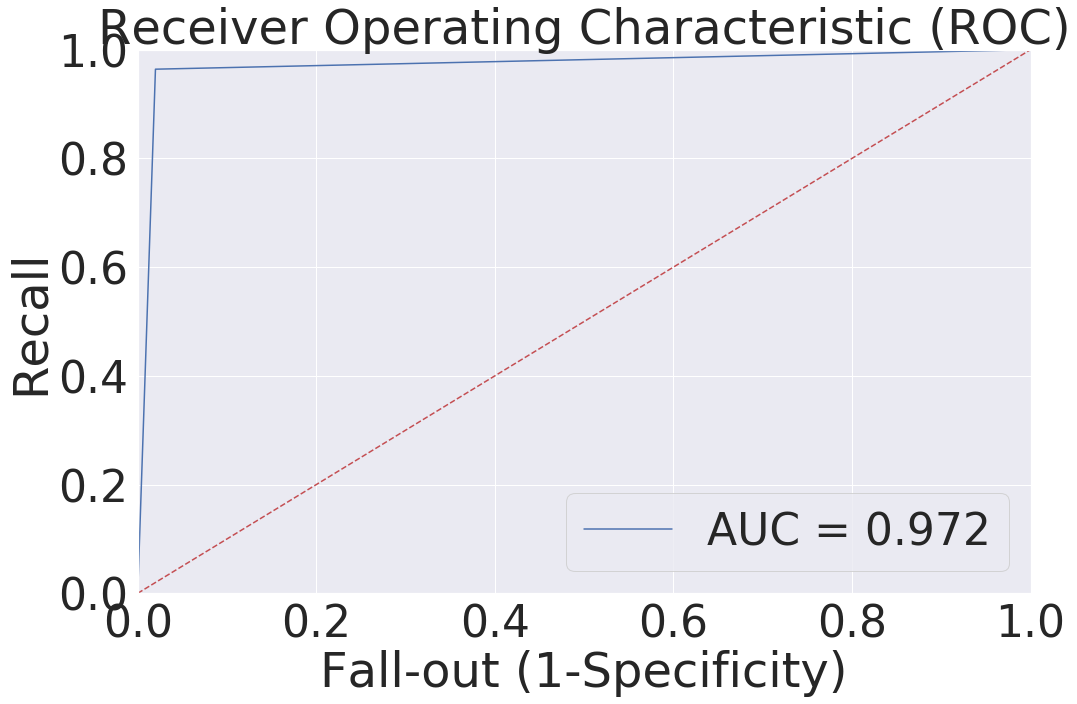

('roc_auc_score:', 0.9721322788804709)


<Figure size 1152x720 with 0 Axes>

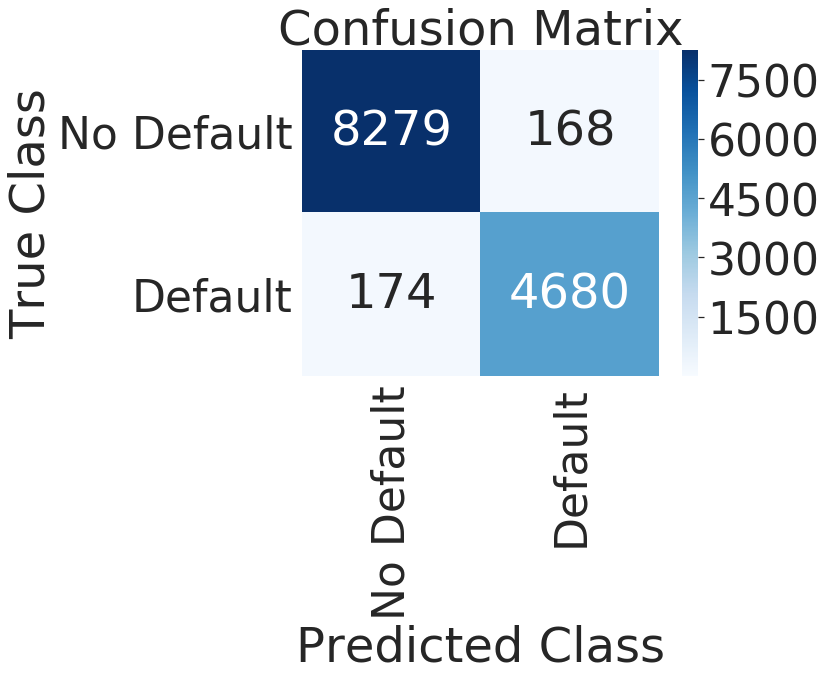

In [229]:
#Print accuracy
#CatBoostClassifier.plot_importance(model_cat, max_num_features=21, importance_type='split')
auc_cat = roc_auc_score(y_test,preds_cat)
print('roc_auc_score of CATBOOST model:', auc_cat)
print('Precision Metric:',precision_score(y_test, preds_cat))
print('Recall Metric:',recall_score(y_test, preds_cat))

#Print Area Under Curve
plt.figure(figsize=(16, 10))
false_positive_rate, recall, thresholds = roc_curve(y_test, preds_cat)
roc_auc = auc(false_positive_rate, recall)
plt.title('Receiver Operating Characteristic (ROC)')
plt.plot(false_positive_rate, recall, 'b', label = 'AUC = %0.3f' %roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.ylabel('Recall')
plt.xlabel('Fall-out (1-Specificity)')
plt.show()

#print('AUC score:', roc_auc)
print('roc_auc_score:', roc_auc_score(y_test,preds_cat))
#Print Confusion Matrix
plt.figure(figsize=(16, 10))
cm = confusion_matrix(y_test, preds_cat)
labels = ['No Default', 'Default']
plt.figure(figsize=(8,6))
sns.heatmap(cm, xticklabels = labels, yticklabels = labels, annot = True, fmt='d', cmap="Blues", vmin = 0.2);
plt.title('Confusion Matrix')
plt.ylabel('True Class')
plt.xlabel('Predicted Class')
plt.show()

## 6.6 LightGBM Model.

In [230]:
from sklearn.model_selection import train_test_split, GridSearchCV
try:
    import lightgbm as lgb
except ImportError:
    !pip install lightgbm
    import lightgbm as lgb

train_data=lgb.Dataset(X_train, label=y_train)

#Select Hyper-Parameters
params = {'boosting_type': 'gbdt',
          'max_depth' : -1,
          'objective': 'binary',
          'nthread': 5,
          'num_leaves': 64,
          'learning_rate': 0.07,
          'max_bin': 512,
          'subsample_for_bin': 200,
          'subsample': 1,
          'subsample_freq': 1,
          'colsample_bytree': 0.8,
          'reg_alpha': 1.2,
          'reg_lambda': 1.2,
          'min_split_gain': 0.5,
          'min_child_weight': 1,
          'min_child_samples': 5,
          'scale_pos_weight': 1,
          'num_class' : 1,
          'metric' : 'auc'
          }
# Create parameters to search
gridParams = {
    'learning_rate': [0.1],
    'n_estimators': [48],
    'num_leaves': [35],
    'boosting_type' : ['gbdt'],
    'objective' : ['binary'],
    'random_state' : [501], 
    'colsample_bytree' : [0.75],
    'subsample' : [0.5]
   # 'metric' : 'auc'
    #'reg_alpha' : [1, 1.2],
    #'reg_lambda' : [ 1.2, 1.4],
    }

# Create classifier to use
mdl = lgb.LGBMClassifier(boosting_type= 'gbdt',
          objective = 'binary',
          n_jobs = 5, 
          silent = True,
          metric='auc',
          max_depth = params['max_depth'],
          max_bin = params['max_bin'],
          subsample_for_bin = params['subsample_for_bin'],
          subsample = params['subsample'],
          subsample_freq = params['subsample_freq'],
          min_split_gain = params['min_split_gain'],
          min_child_weight = params['min_child_weight'],
          min_child_samples = params['min_child_samples'],
          scale_pos_weight = params['scale_pos_weight'])

# View the default model params:
mdl.get_params().keys()

# Create the grid
grid = GridSearchCV(mdl, gridParams, verbose=2, cv=4, n_jobs=-1)

# Run the grid
grid.fit(X_train, y_train)

# Print the best parameters found
print(grid.best_params_)
print(grid.best_score_)

Fitting 4 folds for each of 1 candidates, totalling 4 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    4.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    4.1s finished


{'num_leaves': 35, 'colsample_bytree': 0.75, 'learning_rate': 0.1, 'n_estimators': 48, 'subsample': 0.5, 'random_state': 501, 'objective': 'binary', 'boosting_type': 'gbdt'}
0.9744697564807542


In [231]:
# Using parameters already set above, replace in the best from the grid search
params['colsample_bytree'] = grid.best_params_['colsample_bytree']
params['learning_rate'] = grid.best_params_['learning_rate']
#params['max_bin'] = grid.best_params_['max_bin']
params['num_leaves'] = grid.best_params_['num_leaves']
params['n_estimators'] = grid.best_params_['n_estimators']
#params['reg_lambda'] = grid.best_params_['reg_lambda']
params['subsample'] = grid.best_params_['subsample']
# params['subsample_for_bin'] = grid.best_params_['subsample_for_bin']

In [232]:
print('Fitting with params: ')
print(params)

#Train model on selected parameters and number of iterations
lgbm = lgb.train(params,
                 train_data,
                 280,
                 #early_stopping_rounds= 40,
                 verbose_eval= 4
                 )

#Predict on test set
predictions_lgbm_prob = lgbm.predict(X_test)
predictions_lgbm_01 = np.where(predictions_lgbm_prob > 0.5, 1, 0) #Turn probability to 0-1 binary output

Fitting with params: 
{'num_leaves': 35, 'reg_alpha': 1.2, 'subsample_for_bin': 200, 'colsample_bytree': 0.75, 'scale_pos_weight': 1, 'learning_rate': 0.1, 'nthread': 5, 'min_child_weight': 1, 'min_split_gain': 0.5, 'n_estimators': 48, 'subsample': 0.5, 'reg_lambda': 1.2, 'subsample_freq': 1, 'max_bin': 512, 'objective': 'binary', 'num_class': 1, 'min_child_samples': 5, 'max_depth': -1, 'metric': 'auc', 'boosting_type': 'gbdt'}
[LightGBM] [Info] Number of positive: 12726, number of negative: 22918
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001963 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 359
[LightGBM] [Info] Number of data points in the train set: 35644, number of used features: 40
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.357031 -> initscore=-0.588275
[LightGBM] [Info] Start training from score -0.588275
[LightGB

/home/ec2-user/anaconda3/envs/amazonei_mxnet_p27/lib/python2.7/site-packages/lightgbm/engine.py:151: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


('roc_auc_score of Light GBM model:', 0.9709661209971148)
('Precision Metric:', 0.9631231973629996)
('Recall Metric:', 0.9631231973629996)


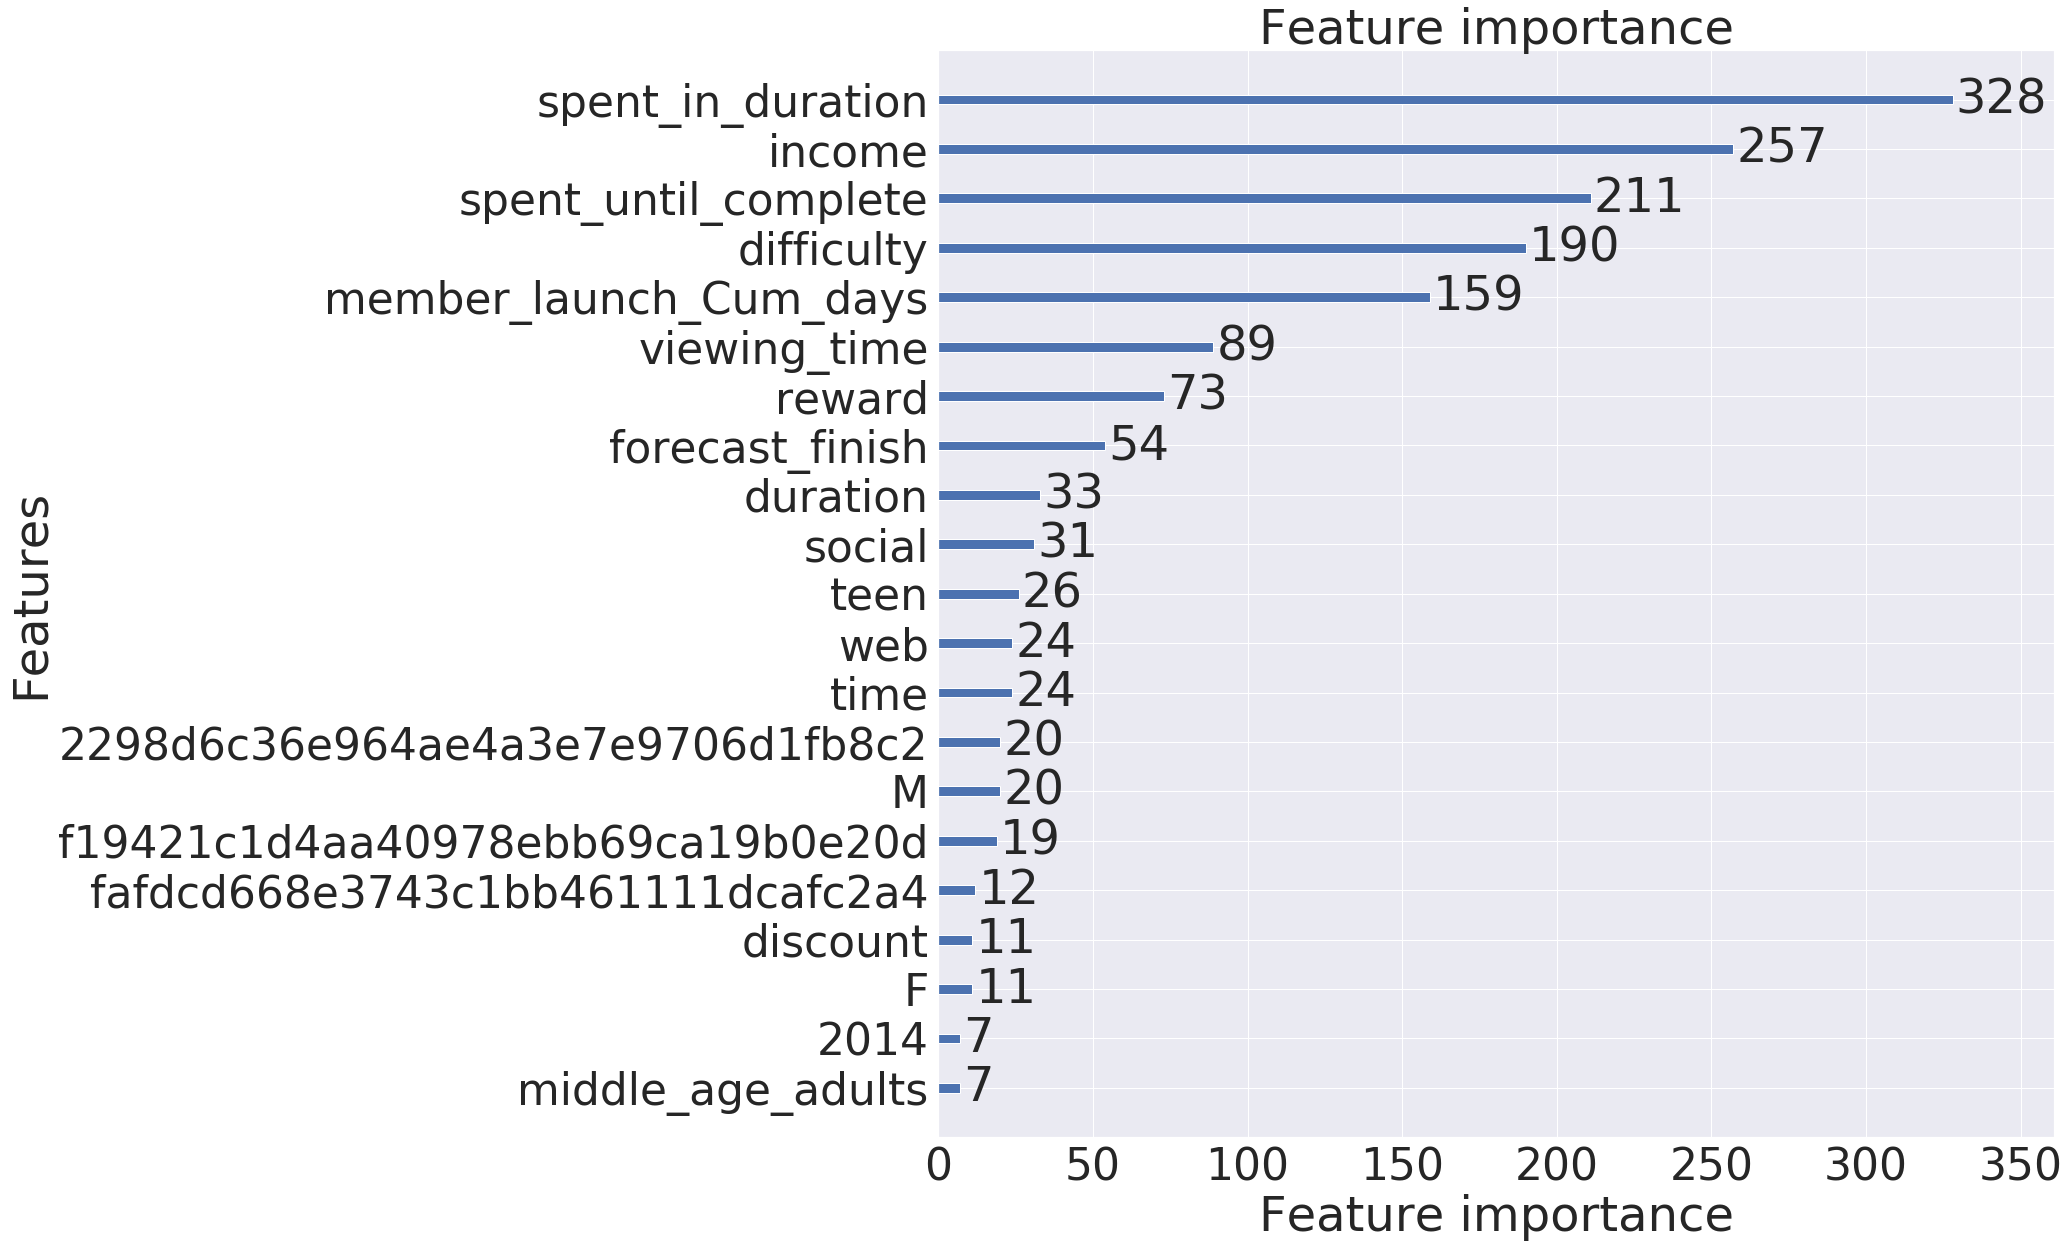

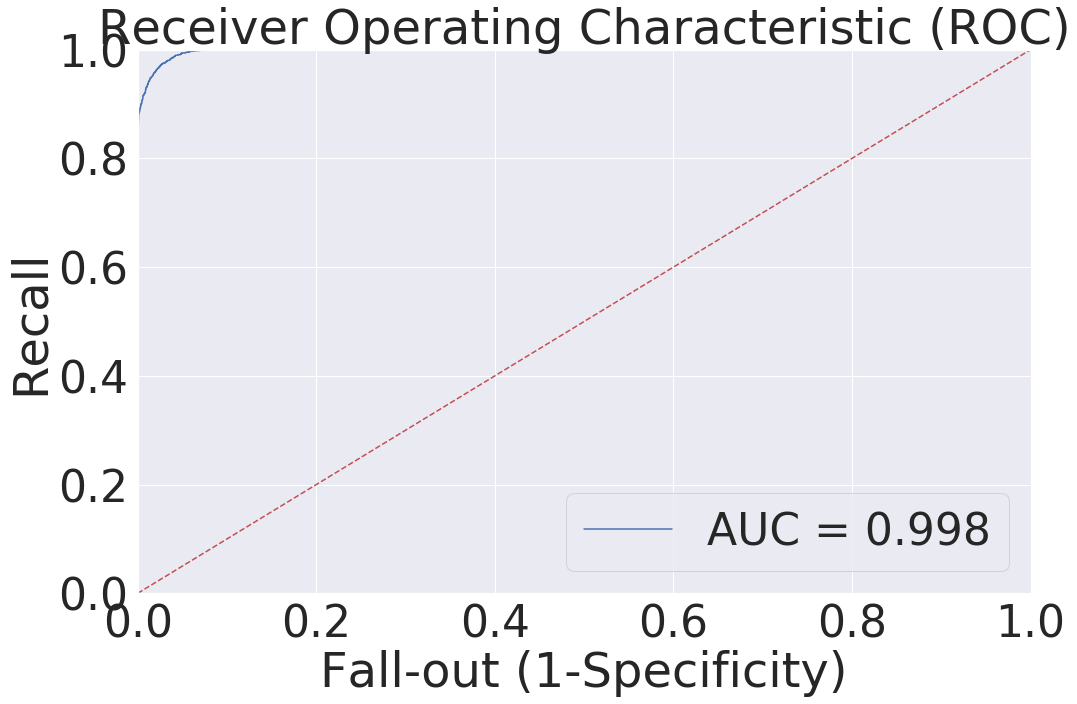

('roc_auc_score:', 0.9709661209971148)


<Figure size 1152x720 with 0 Axes>

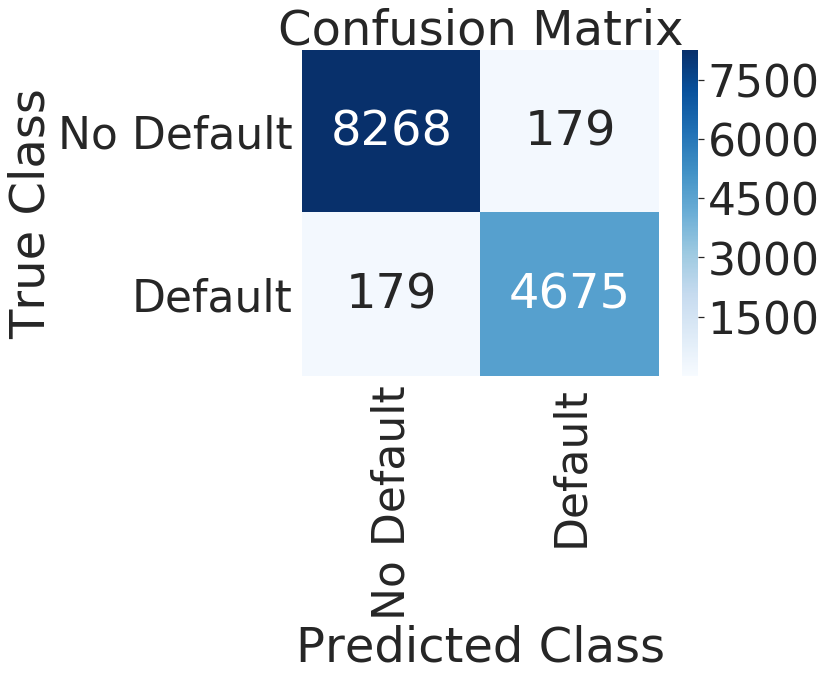

In [233]:
from sklearn.metrics import confusion_matrix,accuracy_score, roc_curve, auc

lgb.plot_importance(lgbm, max_num_features=21, importance_type='split',figsize= (20,20))

#Print accuracy
auc_lgbm = roc_auc_score(y_test,predictions_lgbm_01)
print('roc_auc_score of Light GBM model:', auc_lgbm)
print('Precision Metric:',precision_score(y_test, predictions_lgbm_01))
print('Recall Metric:',recall_score(y_test, predictions_lgbm_01))
#Print Area Under Curve
plt.figure(figsize=(16, 10))
false_positive_rate, recall, thresholds = roc_curve(y_test, predictions_lgbm_prob)
roc_auc = auc(false_positive_rate, recall)
plt.title('Receiver Operating Characteristic (ROC)')
plt.plot(false_positive_rate, recall, 'b', label = 'AUC = %0.3f' %roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.ylabel('Recall')
plt.xlabel('Fall-out (1-Specificity)')
plt.show()

#roc_auc_score(y_test, predictions)

#print('AUC score:', roc_auc)
print('roc_auc_score:', roc_auc_score(y_test, predictions_lgbm_01))

#Print Confusion Matrix
plt.figure(figsize=(16, 10))
cm = confusion_matrix(y_test, predictions_lgbm_01)
labels = ['No Default', 'Default']
plt.figure(figsize=(8,6))
sns.heatmap(cm, xticklabels = labels, yticklabels = labels, annot = True, fmt='d', cmap="Blues", vmin = 0.2);
plt.title('Confusion Matrix')
plt.ylabel('True Class')
plt.xlabel('Predicted Class')
plt.show()

# Conclusion

In [234]:
models_performance = []

classifier_type = ['Logistic_regression',
                   'Random_Forrest_classifier',
                   'Decision_Tree_Classifier',
                   'KNeighborsClassifier',
                  'XGBoost',
                  'LGB',
                  'CatBoost']

models_performance.append((roc_auc_score(y_test, y_pred_LOG),
                          precision_score(y_test, y_pred_LOG),recall_score(y_test, y_pred_LOG)))


models_performance.append((roc_auc_score(y_test, np.around(y_pred_RF)),
                          precision_score(y_test, y_pred_RF),recall_score(y_test, y_pred_RF)))


models_performance.append((roc_auc_score(y_test, y_pred_tree),
                          precision_score(y_test, y_pred_tree),recall_score(y_test, y_pred_tree)))


models_performance.append((roc_auc_score(y_test, y_pred_knn),
                          precision_score(y_test, y_pred_knn),recall_score(y_test, y_pred_knn)))


models_performance.append((roc_auc_score(y_test, predictions),
                          precision_score(y_test, predictions),recall_score(y_test, predictions)))


models_performance.append((roc_auc_score(y_test, predictions_lgbm_01),
                          precision_score(y_test, predictions_lgbm_01),recall_score(y_test, predictions_lgbm_01)))


models_performance.append((roc_auc_score(y_test, preds_cat),
                          precision_score(y_test, preds_cat),recall_score(y_test, preds_cat)))


models_performance= pd.DataFrame(models_performance,columns=['roc_auc_score', 'Precision Metric','Recall Metric'])

classifier_type = pd.DataFrame(classifier_type,
                               columns=['classifiertype'])

models_performance = pd.concat([classifier_type, models_performance], axis=1)

models_performance = models_performance.sort_values('Recall Metric', ascending=False)
models_performance = models_performance.reset_index(drop=True)
models_performance

,classifiertype,roc_auc_score,Precision Metric,Recall Metric
0,Random_Forrest_classifier,0.970250,0.949214,0.970334
1,XGBoost,0.972351,0.964389,0.965183
2,CatBoost,0.972132,0.965347,0.964153
3,LGB,0.970966,0.963123,0.963123
4,Decision_Tree_Classifier,0.961712,0.955017,0.949114
5,Logistic_regression,0.853176,0.818845,0.809230
6,KNeighborsClassifier,0.780796,0.717515,0.725793
